In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import deepdish as dd

In [213]:
def load(args):
    args['image_suffix'] = args.get("image_suffix", "")
    cache_path = f"{args['save-dir']}/{args['experiment']}/{args['expid']}/cache"
    cache_file = f"{cache_path}/{args['visualization']}{args['image_suffix']}.h5"
    if os.path.isfile(cache_file):
        steps, empirical, theoretical = dd.io.load(cache_file)
        return (steps, empirical, theoretical)
    else:
        print(f"You do not have a cache file @ {cache_file}. Run the plot in the command line first")
        return (None, None, None)

In [202]:
def plot(steps, empirical, theoretical, axes, 
    layer_list=None, layer_wise=False, subset=0, normalize=False, legend=False,
    color_idx_adj=0,
):
    
    if empirical is not None or theoretical is not None:
        # get layer list
        empirical_or_theoretical = empirical if theoretical is None else theoretical
        layers = list(empirical_or_theoretical.keys())
        if "conv" in layers[0]:
            layers = sorted(layers, key=lambda l: int(l.split("conv")[1]))
        if layer_list is not None:
            layers = [layers[i] for i in layer_list]
        
    # plot empirical
    if empirical is not None:
        for layer in layers:
            norm = list(empirical[layer].values())
            if layer_wise:
                norm = [np.sum(i) for i in norm]
            if subset > 0:
                norm = [i[0:subset] for i in norm]
            if normalize:
                norm = norm / norm[0]
            color = plt.cm.tab20(1)
            if "conv" in layer:
                color_idx = int(layer.split("conv")[1]) - 1 + color_idx_adj
                color = plt.cm.tab20(color_idx)
            axes.plot(
                steps,
                norm,
                color=color,
                lw=5,
                label=layer
            )
    if legend:
        plt.legend()
            
    # plot theoretical
    if theoretical is not None:
        for layer in layers:
            norm = list(theoretical[layer].values())
            if layer_wise:
                norm = [np.sum(i) for i in norm]
            if subset > 0:
                norm = [i[0:subset] for i in norm]
            if normalize:
                norm = norm[0]
            axes.plot(
                steps,
                norm,
                color='k',
                ls='--',
                lw=2,
                alpha=0.5
            )

# Motivational Figure

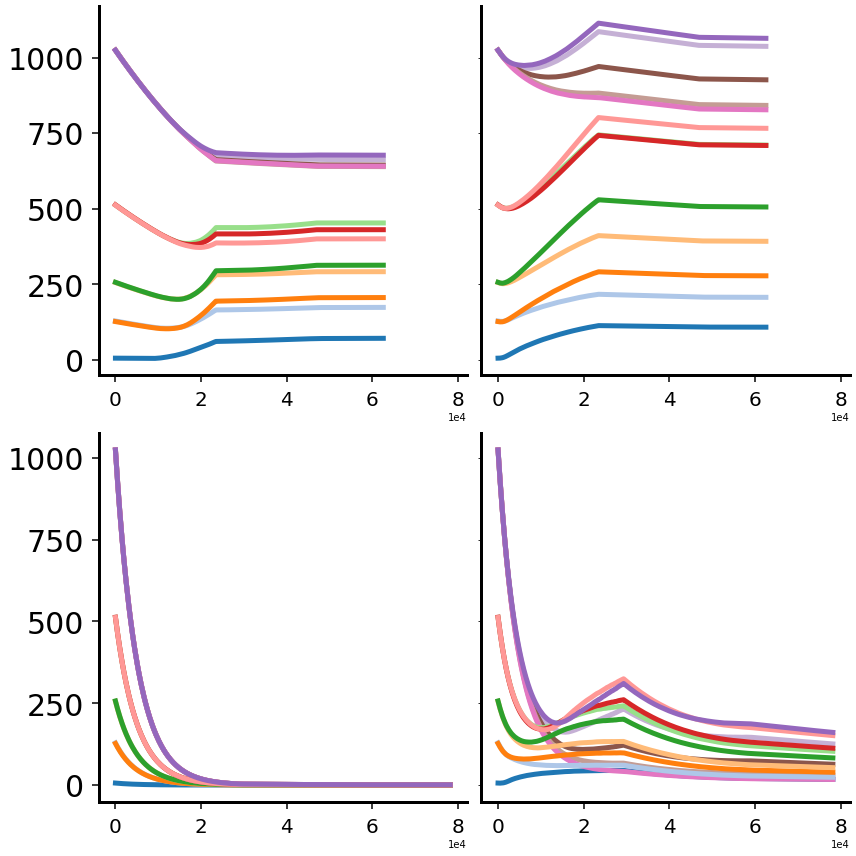

In [5]:
args = {
    "save-dir": "/mnt/fs4/kunin/neural-mechanics/results",
    "experiment": "lr_drops",
    "visualization": "scale"
}
fig, axs = plt.subplots(2, 2, figsize=(12, 12), sharex='col', sharey='row')
lr, wd = 0.01, 0.0
for i, expid in enumerate(["vgg16", "vgg16_bn", "vgg16_e200_lr1_wd3", "vgg16_bn_e200_lr1_wd3"]):

        # plot data
        ax = axs[i//2, i%2]
        args['expid'] = f"{expid}"
        steps, empirical, theoretical = load(args)
        plot(steps, empirical, None, ax, layer_wise=True)

        # tick params and axis labels
        if i%2 == 0:
            ax.tick_params(axis="y", which="both", bottom=True, top=False,
                           labelbottom=True, left=True, right=False,
                           labelleft=True,direction='out',length=7,width=1.5,pad=8,labelsize=30)
            ax.yaxis.set_major_locator(plt.MaxNLocator(5))
        ax.tick_params(axis="x", which="both", bottom=True, top=False,
                       labelbottom=True, left=True, right=False,
                       labelleft=True,direction='out',length=7,width=1.5,pad=8,
                       labelsize=20)
        ax.xaxis.set_major_locator(plt.MaxNLocator(5))
        ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
            
        # boundary
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False) 
        for dir in ["top", "bottom", "right", "left"]:
            ax.spines[dir].set_linewidth(3)
            
plt.tight_layout()

## Tiny-ImageNet

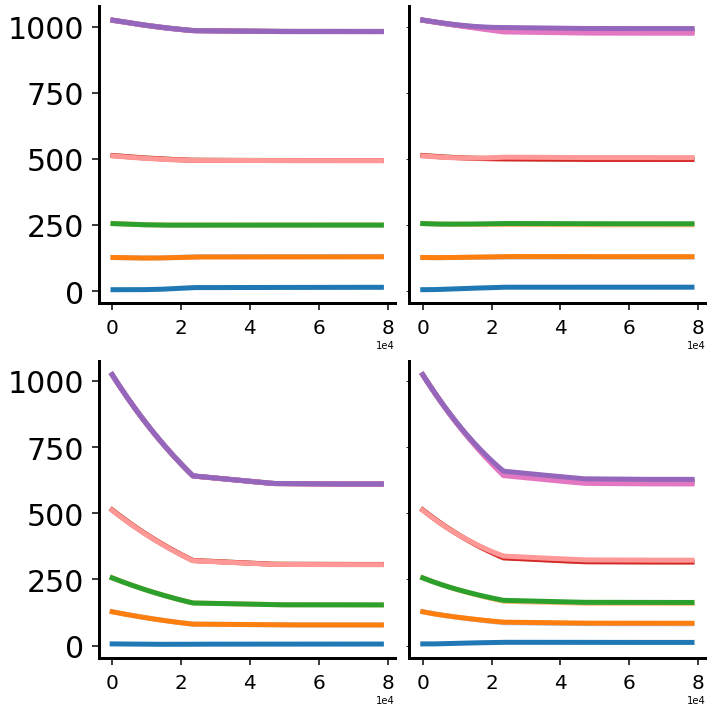

In [8]:
args = {
    "save-dir": "/mnt/fs4/kunin/neural-mechanics/results",
    "experiment": "tiny",
    "visualization": "scale"
}
fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex='col', sharey='row')
for i, expid in enumerate(["vgg16_lr2_wd4", "vgg16bn_lr2_wd4", "vgg16_lr2_wd3", "vgg16bn_lr2_wd3"]):

        # plot data
        ax = axs[i//2, i%2]
        args['expid'] = f"{expid}"
        steps, empirical, theoretical = load(args)
        plot(steps, empirical, None, ax, layer_wise=True)

        # tick params and axis labels
        if i%2 == 0:
            ax.tick_params(axis="y", which="both", bottom=True, top=False,
                           labelbottom=True, left=True, right=False,
                           labelleft=True,direction='out',length=7,width=1.5,pad=8,labelsize=30)
            ax.yaxis.set_major_locator(plt.MaxNLocator(5))
        ax.tick_params(axis="x", which="both", bottom=True, top=False,
                       labelbottom=True, left=True, right=False,
                       labelleft=True,direction='out',length=7,width=1.5,pad=8,
                       labelsize=20)
        ax.xaxis.set_major_locator(plt.MaxNLocator(5))
        ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
            
        # boundary
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False) 
        for dir in ["top", "bottom", "right", "left"]:
            ax.spines[dir].set_linewidth(3)
            
plt.tight_layout()

# Translation Symmetry

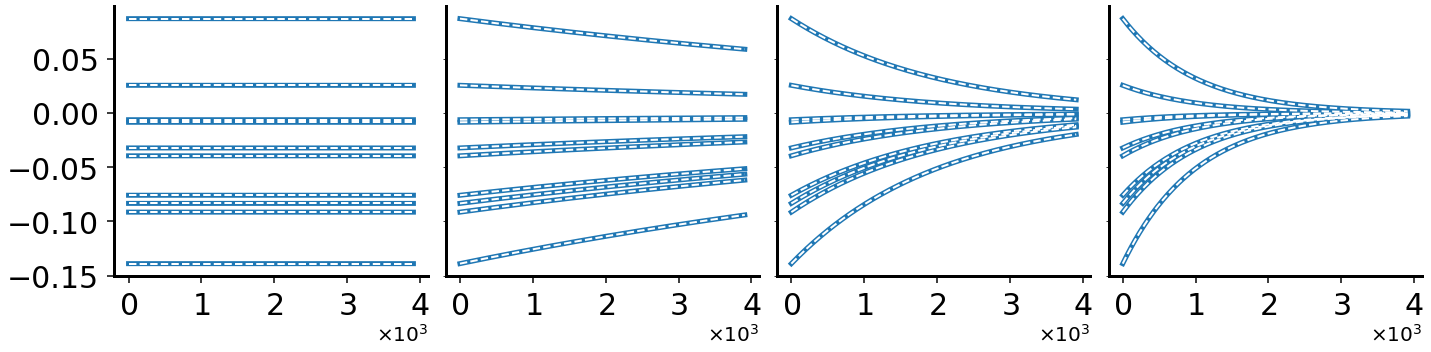

In [4]:
args = {
    "save-dir": "/mnt/fs4/kunin/neural-mechanics/results",
    "experiment": "vgg16",
    "visualization": "translation"
}
fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharex='col', sharey=True)
for i, lr in enumerate([0.1]):
    for j, wd in enumerate([0.0, 0.0001, 0.0005, 0.001]):
        
        # plot data
        ax = axs[j]
        if lr == 0.01:
            args['experiment'] = f"vgg16_long"
        else:
            args['experiment'] = f"vgg16"
        args['expid'] = f"lr_{lr}_wd_{wd}"
        steps, empirical, theoretical = load(args)
        if steps is not None:
            steps = [lr * float(step) for step in steps]
        plot(steps, empirical, theoretical, ax, subset=10) # layer_wise=True)

        # tick params and axis labels
        if j == 0:
            ax.tick_params(axis="y", which="both", bottom=True, top=False,
                           labelbottom=True, left=True, right=False,
                           labelleft=True,direction='out',length=7,width=1.5,pad=8,labelsize=30)
            ax.yaxis.set_major_locator(plt.MaxNLocator(5))
        if i == 0:
            ax.tick_params(axis="x", which="both", bottom=True, top=False,
                           labelbottom=True, left=True, right=False,
                           labelleft=True,direction='out',length=7,width=1.5,pad=8,
                           labelsize=30)
            ax.xaxis.set_major_locator(plt.MaxNLocator(5))
            ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0), useMathText=True)
            ax.xaxis.offsetText.set_fontsize(20)
            
        # boundary
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False) 
        for dir in ["top", "bottom", "right", "left"]:
            ax.spines[dir].set_linewidth(3)
            
plt.tight_layout()
plt.savefig("translation.pdf")

# Scale Symmetry

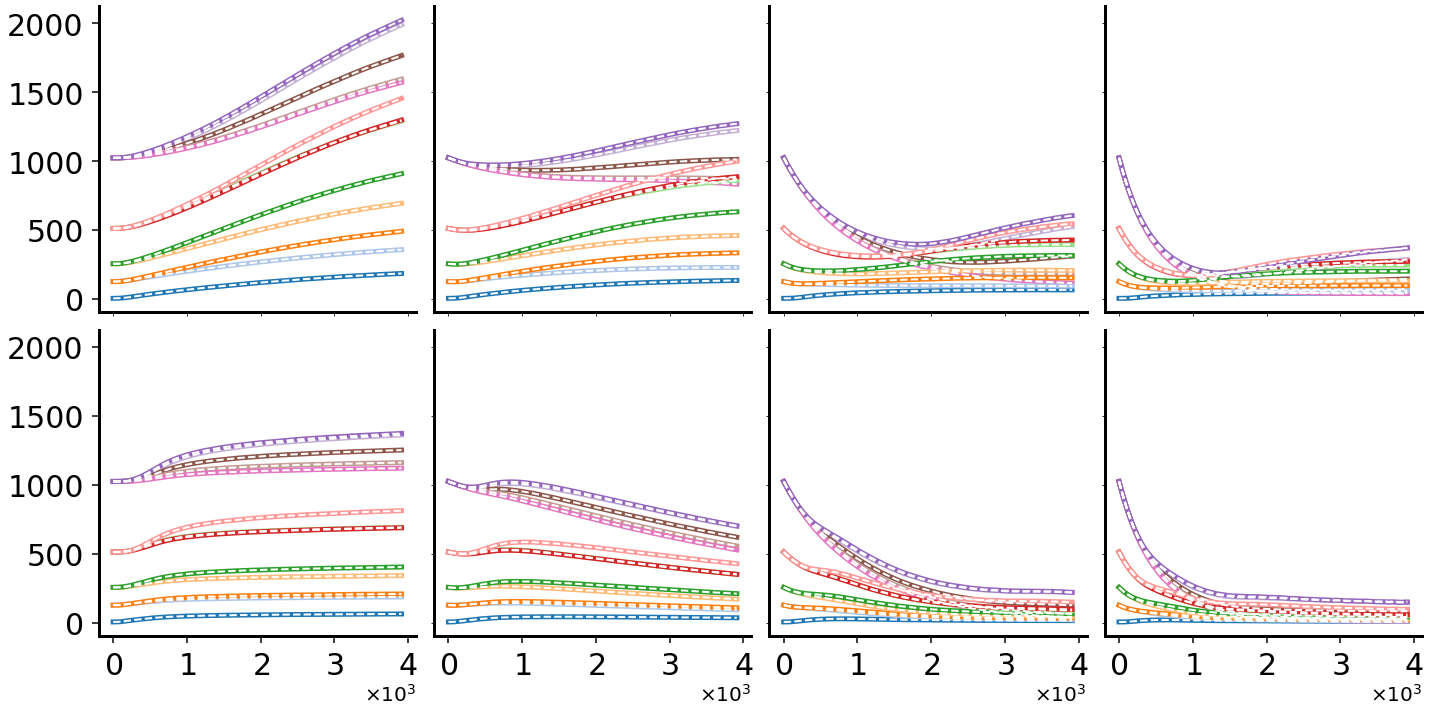

In [4]:
args = {
    "save-dir": "/mnt/fs4/kunin/neural-mechanics/results",
    "experiment": "vgg16_bn",
    "visualization": "scale"
}
fig, axs = plt.subplots(2, 4, figsize=(20, 10), sharex='col', sharey=True)
for i, lr in enumerate([0.1, 0.01]):
    for j, wd in enumerate([0.0, 0.0001, 0.0005, 0.001]):
        
        # plot data
        ax = axs[i,j]
        if lr == 0.01 and wd != 0.0005:
            args['experiment'] = f"vgg16bn_long"
        else:
            args['experiment'] = f"vgg16_bn"
        args['expid'] = f"lr_{lr}_wd_{wd}"
        steps, empirical, theoretical = load(args)
        if steps is not None:
            steps = [lr * float(step) for step in steps]
        plot(steps, empirical, theoretical, ax, layer_wise=True)  

        # tick params and axis labels
        if j == 0:
            ax.tick_params(axis="y", which="both", bottom=True, top=False,
                           labelbottom=True, left=True, right=False,
                           labelleft=True,direction='out',length=7,width=1.5,pad=8,labelsize=30)
            ax.yaxis.set_major_locator(plt.MaxNLocator(5))
        if i == 1:
            ax.tick_params(axis="x", which="both", bottom=True, top=False,
                           labelbottom=True, left=True, right=False,
                           labelleft=True,direction='out',length=7,width=1.5,pad=8,
                           labelsize=30)
            ax.xaxis.set_major_locator(plt.MaxNLocator(5))
            ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0), useMathText=True)
            ax.xaxis.offsetText.set_fontsize(20)
            
        # boundary
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False) 
        for dir in ["top", "bottom", "right", "left"]:
            ax.spines[dir].set_linewidth(3)
            
plt.tight_layout()
plt.savefig("scale.pdf")

# Inversion Symmetry

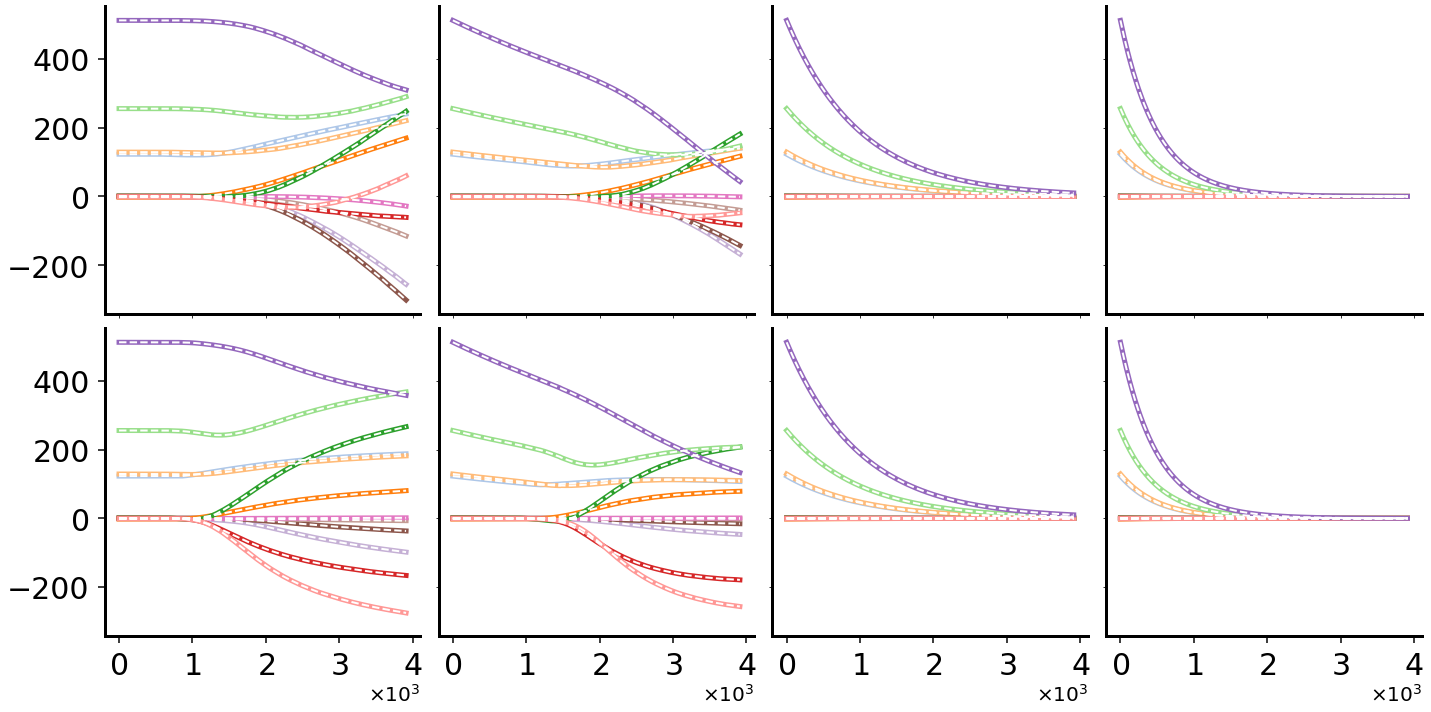

In [11]:
args = {
    "save-dir": "/mnt/fs4/kunin/neural-mechanics/results",
    "experiment": "vgg16",
    "expid": "lr_0.1_wd_0.0",
    "visualization": "inversion"
}
fig, axs = plt.subplots(2, 4, figsize=(20, 10), sharex='col', sharey=True)
for i, lr in enumerate([0.1, 0.01]):
    for j, wd in enumerate([0.0, 0.0001, 0.0005, 0.001]):
        
        # plot data
        ax = axs[i,j]
        if lr == 0.01 and wd != 0.0005:
            args['experiment'] = f"vgg16_long"
        else:
            args['experiment'] = f"vgg16"
        args['expid'] = f"lr_{lr}_wd_{wd}"
        steps, empirical, theoretical = load(args)
        if steps is not None:
            steps = [lr * float(step) for step in steps]
        plot(steps, empirical, theoretical, ax, layer_wise=True)

        # tick params and axis labels
        if j == 0:
            ax.tick_params(axis="y", which="both", bottom=True, top=False,
                           labelbottom=True, left=True, right=False,
                           labelleft=True,direction='out',length=7,width=1.5,pad=8,labelsize=30)
            ax.yaxis.set_major_locator(plt.MaxNLocator(5))
        if i == 1:
            ax.tick_params(axis="x", which="both", bottom=True, top=False,
                           labelbottom=True, left=True, right=False,
                           labelleft=True,direction='out',length=7,width=1.5,pad=8,
                           labelsize=30)
            ax.xaxis.set_major_locator(plt.MaxNLocator(5))
            ax.ticklabel_format(axis="x", style="scientific", scilimits=(0,0), useMathText=True)
            ax.xaxis.offsetText.set_fontsize(20)
            
        # boundary
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False) 
        for dir in ["top", "bottom", "right", "left"]:
            ax.spines[dir].set_linewidth(3)
            
plt.tight_layout()
plt.savefig("inversion.pdf")

# Extra Long Training

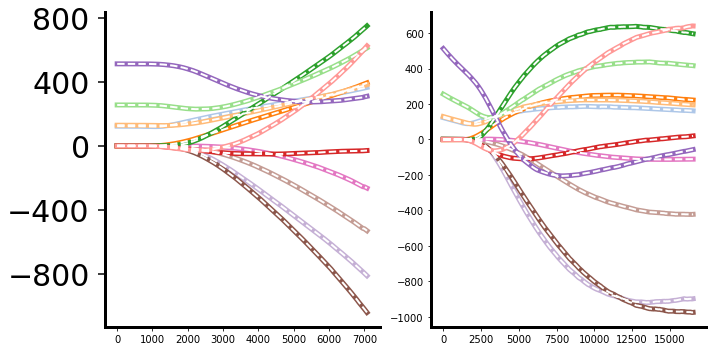

In [12]:
args = {
    "save-dir": "/mnt/fs4/kunin/neural-mechanics/results",
    "experiment": "vgg16",
    "expid": "lr_0.1_wd_0.0",
    "visualization": "inversion"
}
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex='col')#, sharey=True) #sharex='col'
for i, lr in enumerate([0.1]):
    for j, wd in enumerate([0.0, 0.0001]):
        
        # plot data
        ax = axs[j]
        args['expid'] = f"lr_{lr}_wd_{wd}_e1000"
        steps, empirical, theoretical = load(args)
        if steps is not None:
            steps = [lr * float(step) for step in steps]
        plot(steps, empirical, theoretical, ax, layer_wise=True)

        # tick params and axis labels
        if j == 0:
            ax.tick_params(axis="y", which="both", bottom=True, top=False,
                           labelbottom=True, left=True, right=False,
                           labelleft=True,direction='out',length=7,width=1.5,pad=8,labelsize=30)
            ax.yaxis.set_major_locator(plt.MaxNLocator(5))
        if i == 1:
            ax.tick_params(axis="x", which="both", bottom=True, top=False,
                           labelbottom=True, left=True, right=False,
                           labelleft=True,direction='out',length=7,width=1.5,pad=8,
                           labelsize=20)
            ax.xaxis.set_major_locator(plt.MaxNLocator(5))
            ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
            
        # boundary
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False) 
        for dir in ["top", "bottom", "right", "left"]:
            ax.spines[dir].set_linewidth(3)
            
plt.tight_layout()

# Large Batch Size

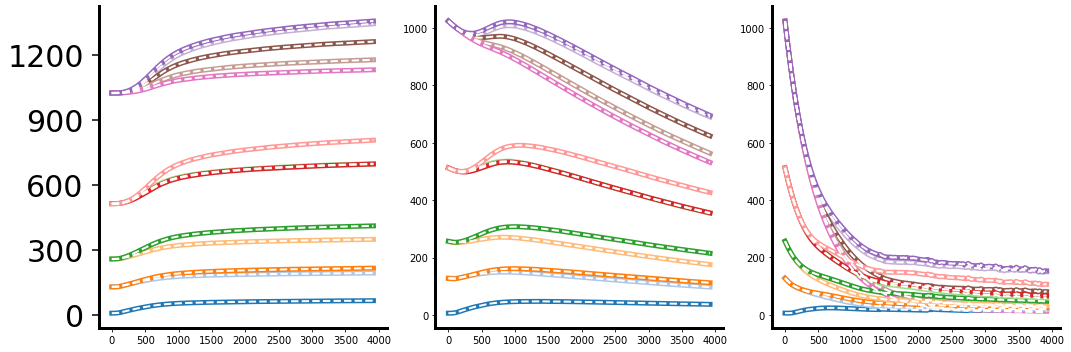

In [14]:
args = {
    "save-dir": "/mnt/fs4/kunin/neural-mechanics/results",
    "experiment": "vgg16bn_large_batch",
    "expid": "lr_0.1_wd_0.0",
    "visualization": "scale"
}
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex='col')#, sharey=True) #sharex='col'
for i, lr in enumerate([0.1]):
    for j, wd in enumerate([0.0, 0.0001, 0.001]):
        
        # plot data
        ax = axs[j]
        args['expid'] = f"lr_{lr}_wd_{wd}"
        steps, empirical, theoretical = load(args)
        if steps is not None:
            steps = [lr * float(step) for step in steps]
        plot(steps, empirical, theoretical, ax, layer_wise=True)

        # tick params and axis labels
        if j == 0:
            ax.tick_params(axis="y", which="both", bottom=True, top=False,
                           labelbottom=True, left=True, right=False,
                           labelleft=True,direction='out',length=7,width=1.5,pad=8,labelsize=30)
            ax.yaxis.set_major_locator(plt.MaxNLocator(5))
        if i == 1:
            ax.tick_params(axis="x", which="both", bottom=True, top=False,
                           labelbottom=True, left=True, right=False,
                           labelleft=True,direction='out',length=7,width=1.5,pad=8,
                           labelsize=20)
            ax.xaxis.set_major_locator(plt.MaxNLocator(5))
            ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
            
        # boundary
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False) 
        for dir in ["top", "bottom", "right", "left"]:
            ax.spines[dir].set_linewidth(3)
            
plt.tight_layout()

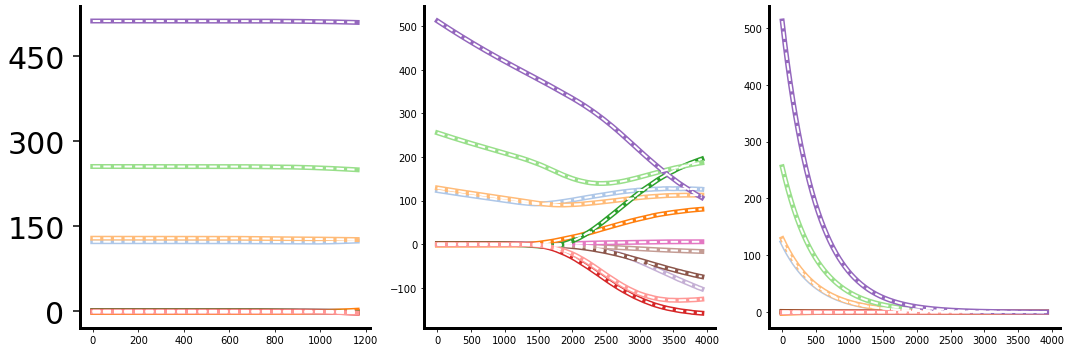

In [15]:
args = {
    "save-dir": "/mnt/fs4/kunin/neural-mechanics/results",
    "experiment": "vgg16_large_batch",
    "expid": "lr_0.1_wd_0.0",
    "visualization": "inversion"
}
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex='col')#, sharey=True) #sharex='col'
for i, lr in enumerate([0.1]):
    for j, wd in enumerate([0.0, 0.0001, 0.001]):
        
        # plot data
        ax = axs[j]
        args['expid'] = f"lr_{lr}_wd_{wd}"
        steps, empirical, theoretical = load(args)
        if steps is not None:
            steps = [lr * float(step) for step in steps]
        plot(steps, empirical, theoretical, ax, layer_wise=True)

        # tick params and axis labels
        if j == 0:
            ax.tick_params(axis="y", which="both", bottom=True, top=False,
                           labelbottom=True, left=True, right=False,
                           labelleft=True,direction='out',length=7,width=1.5,pad=8,labelsize=30)
            ax.yaxis.set_major_locator(plt.MaxNLocator(5))
        if i == 1:
            ax.tick_params(axis="x", which="both", bottom=True, top=False,
                           labelbottom=True, left=True, right=False,
                           labelleft=True,direction='out',length=7,width=1.5,pad=8,
                           labelsize=20)
            ax.xaxis.set_major_locator(plt.MaxNLocator(5))
            ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
            
        # boundary
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False) 
        for dir in ["top", "bottom", "right", "left"]:
            ax.spines[dir].set_linewidth(3)
            
plt.tight_layout()

# First Order

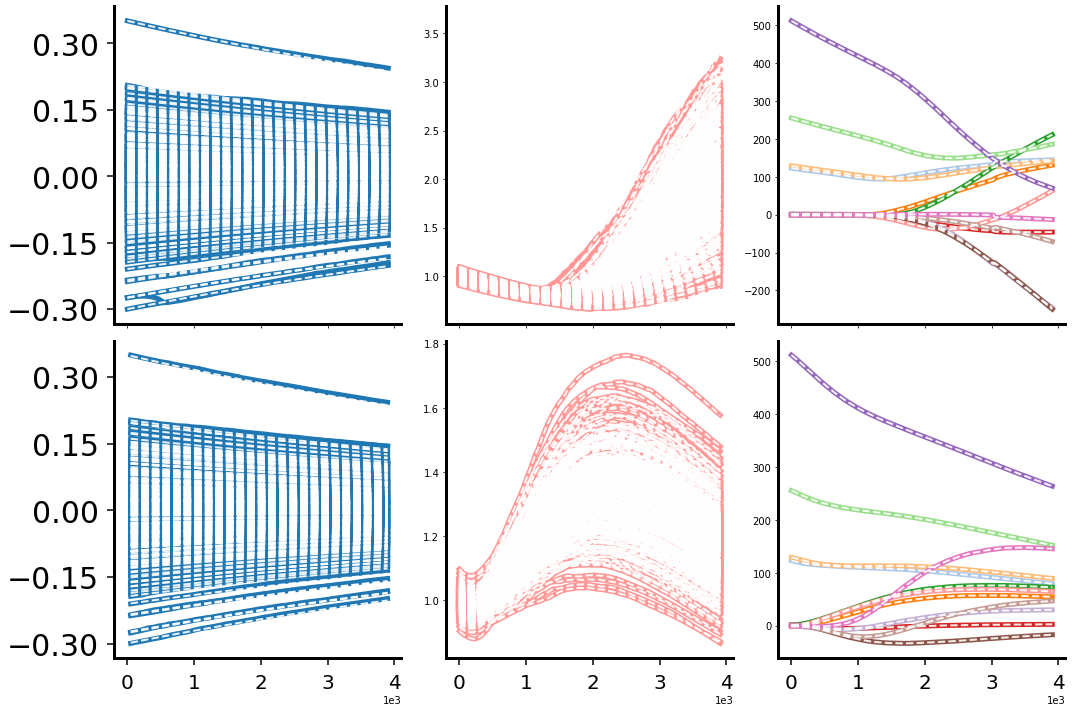

In [61]:
args = {
    "save-dir": "/mnt/fs6/jvrsgsty/neural-mechanics/gs_jvr-pt-tpu",
    "experiment": "fo-vgg16",
    "expid": "lr1en1_wd1en4",
    "visualization": "inversion"
}
fig, axs = plt.subplots(2, 3, figsize=(15, 10), sharex='col')#, sharey=True) #sharex='col'
for i, bn in enumerate(["", "_bn"]):
    for j, viz in enumerate(["translation", "scale", "inversion"]):
        lr_str = "1en1"
        wd_str = "1en4"
        lr = float(lr_str.replace("n", "-"))
        wd = float(wd_str.replace("n", "-"))
        # plot data
        ax = axs[i,j]
        args['expid'] = f"lr{lr_str}_wd{wd_str}{bn}"
        args['visualization'] = f"{viz}"
        steps, empirical, theoretical = load(args)
        if steps is not None:
            steps = [lr * float(step) for step in steps]
        if viz == "translation":
            plot(steps, empirical, theoretical, ax, layer_wise=False)
        elif viz == "scale":
            plot(steps, empirical, theoretical, ax, layer_wise=False, layer_list=[7])
        elif viz == "inversion":
            plot(steps, empirical, theoretical, ax, layer_wise=True)

        # tick params and axis labels
        if j == 0:
            ax.tick_params(axis="y", which="both", bottom=True, top=False,
                           labelbottom=True, left=True, right=False,
                           labelleft=True,direction='out',length=7,width=1.5,pad=8,labelsize=30)
            ax.yaxis.set_major_locator(plt.MaxNLocator(5))
        if i == 1:
            ax.tick_params(axis="x", which="both", bottom=True, top=False,
                           labelbottom=True, left=True, right=False,
                           labelleft=True,direction='out',length=7,width=1.5,pad=8,
                           labelsize=20)
            ax.xaxis.set_major_locator(plt.MaxNLocator(5))
            ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
            
        # boundary
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False) 
        for dir in ["top", "bottom", "right", "left"]:
            ax.spines[dir].set_linewidth(3)
            
plt.tight_layout()

### Playing around with visualizations per layer

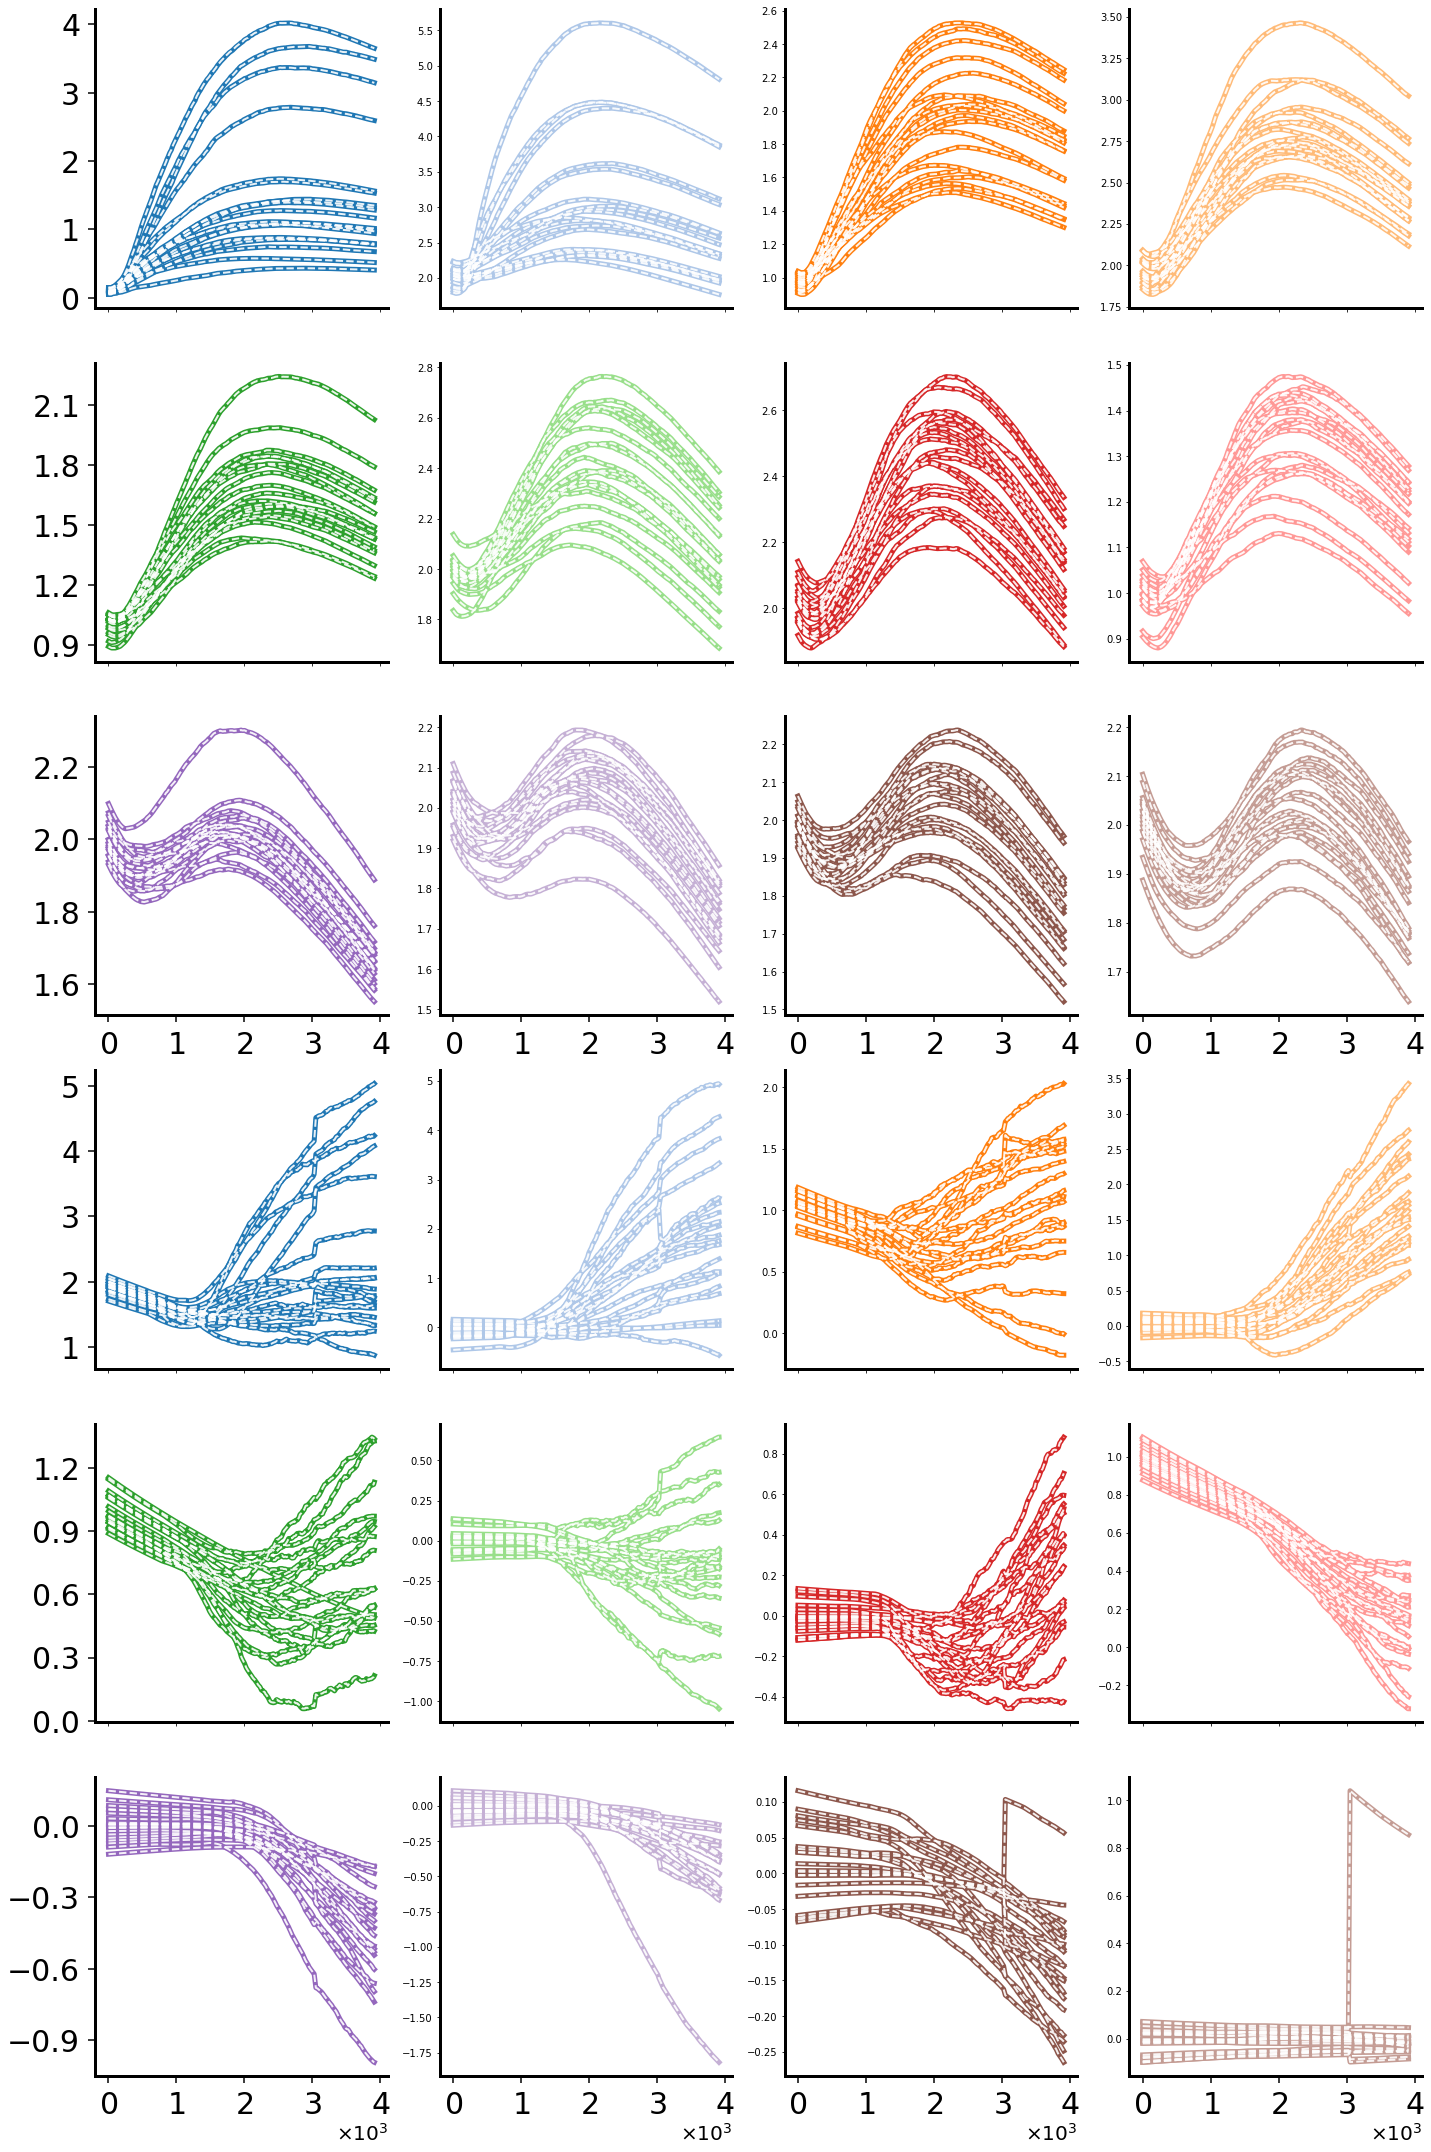

In [122]:
args = {
    "save-dir": "/mnt/fs6/jvrsgsty/neural-mechanics/gs_jvr-pt-tpu",
    "experiment": "fo-vgg16",
    "expid": "lr1en1_wd1en4",
    "visualization": "inversion"
}
nrows = 6
ncols = 4
fig, axs = plt.subplots(nrows, ncols, figsize=(5*ncols, 5*nrows), sharex='col')#, sharey=True) #sharex='col'
for i, layer in enumerate(range(12)):
    for j, viz in enumerate(["scale", "inversion"]):
        lr_str = "1en1"
        wd_str = "1en4"
        lr = float(lr_str.replace("n", "-"))
        wd = float(wd_str.replace("n", "-"))
        # plot data
        ax = axs[i//ncols + j*3, i%ncols]
        bn = "_bn" if viz == "scale" else ""
        args['expid'] = f"lr{lr_str}_wd{wd_str}{bn}"
        args['visualization'] = f"{viz}"
        
        steps, empirical, theoretical = load(args)
        if steps is not None:
            steps = [lr * float(step) for step in steps]
        plot(steps, empirical, theoretical, ax, layer_wise=False, layer_list=[layer], 
             subset=20, color_idx_adj=0 if viz =="scale" else -1)


        # tick params and axis labels
        if i % ncols == 0:
            ax.tick_params(axis="y", which="both", bottom=True, top=False,
                           labelbottom=True, left=True, right=False,
                           labelleft=True,direction='out',length=7,width=1.5,pad=8,labelsize=30)
            ax.yaxis.set_major_locator(plt.MaxNLocator(5))
        if i > 7:
            ax.tick_params(axis="x", which="both", bottom=True, top=False,
                           labelbottom=True, left=True, right=False,
                           labelleft=True,direction='out',length=7,width=1.5,pad=8,
                           labelsize=30)
            ax.xaxis.set_major_locator(plt.MaxNLocator(5))
            ax.ticklabel_format(axis="x", style="scientific", scilimits=(0,0), useMathText=True)
            ax.xaxis.offsetText.set_fontsize(20)
            
        # boundary
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False) 
        for dir in ["top", "bottom", "right", "left"]:
            ax.spines[dir].set_linewidth(3)
            
plt.tight_layout()

# Cifar 100 first order plots (gpu)

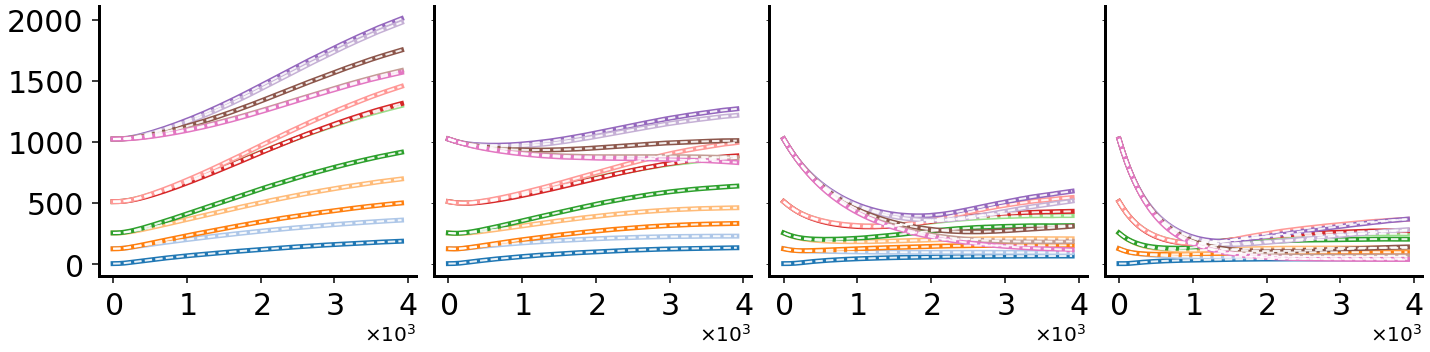

In [99]:
args = {
    "save-dir": "/mnt/fs6/jvrsgsty/neural-mechanics",
    "experiment": "vgg16-bn",
    "visualization": "scale"
}
nrows = 1
ncols = 4
fig, axs = plt.subplots(nrows, ncols, figsize=(5*ncols, 5*nrows), sharex='col', sharey=True) #sharex='col'
for j, wd_str in enumerate(["0.0", "0.0001", "0.0005", "0.001"]):
    lr_str = "0.1"
    lr = float(lr_str.replace("n", "-"))
    wd = float(wd_str.replace("n", "-"))
    # plot data
    ax = axs[j]
    args['expid'] = f"lr_{lr_str}_wd_{wd_str}"

    steps, empirical, theoretical = load(args)
    if steps is not None:
        steps = [lr * float(step) for step in steps]
    plot(steps, empirical, theoretical, ax, layer_wise=True)


    # tick params and axis labels
    if j == 0:
        ax.tick_params(axis="y", which="both", bottom=True, top=False,
                       labelbottom=True, left=True, right=False,
                       labelleft=True,direction='out',length=7,width=1.5,pad=8,labelsize=30)
        ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    
    ax.tick_params(axis="x", which="both", bottom=True, top=False,
                   labelbottom=True, left=True, right=False,
                   labelleft=True,direction='out',length=7,width=1.5,pad=8,
                   labelsize=30)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.ticklabel_format(axis="x", style="scientific", scilimits=(0,0), useMathText=True)
    ax.xaxis.offsetText.set_fontsize(20)

    # boundary
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False) 
    for dir in ["top", "bottom", "right", "left"]:
        ax.spines[dir].set_linewidth(3)
            
plt.tight_layout()
plt.savefig("scale_cifar100.pdf")

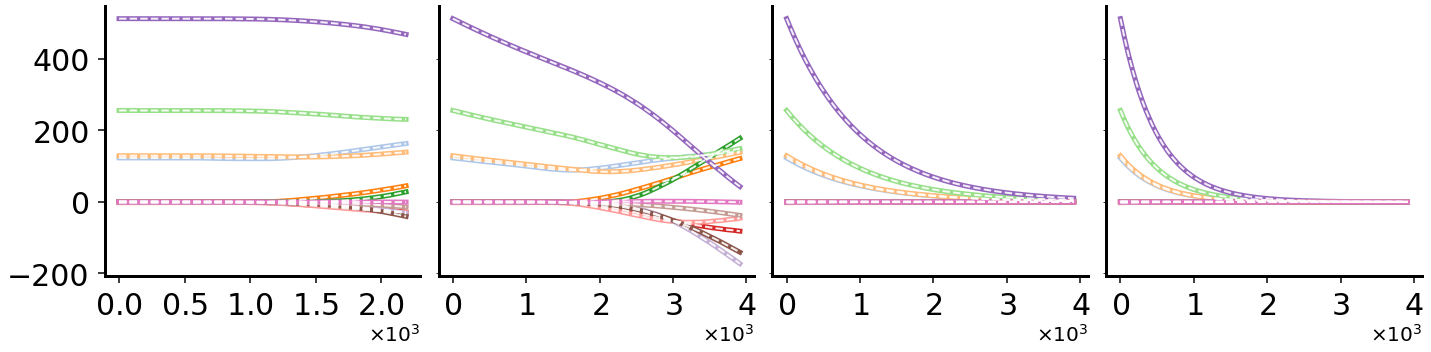

In [104]:
args = {
    "save-dir": "/mnt/fs6/jvrsgsty/neural-mechanics",
    "experiment": "vgg16",
    "visualization": "inversion"
}
nrows = 1
ncols = 4
fig, axs = plt.subplots(nrows, ncols, figsize=(5*ncols, 5*nrows), sharex='col', sharey=True) #sharex='col'
for j, wd_str in enumerate(["0.0", "0.0001", "0.0005", "0.001"]):
    lr_str = "0.1"
    lr = float(lr_str.replace("n", "-"))
    wd = float(wd_str.replace("n", "-"))
    # plot data
    ax = axs[j]
    args['expid'] = f"lr_{lr_str}_wd_{wd_str}"

    steps, empirical, theoretical = load(args)
    if steps is not None:
        steps = [lr * float(step) for step in steps]
    plot(steps, empirical, theoretical, ax, layer_wise=True)


    # tick params and axis labels
    if j == 0:
        ax.tick_params(axis="y", which="both", bottom=True, top=False,
                       labelbottom=True, left=True, right=False,
                       labelleft=True,direction='out',length=7,width=1.5,pad=8,labelsize=30)
        ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    
    ax.tick_params(axis="x", which="both", bottom=True, top=False,
                   labelbottom=True, left=True, right=False,
                   labelleft=True,direction='out',length=7,width=1.5,pad=8,
                   labelsize=30)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.ticklabel_format(axis="x", style="scientific", scilimits=(0,0), useMathText=True)
    ax.xaxis.offsetText.set_fontsize(20)

    # boundary
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False) 
    for dir in ["top", "bottom", "right", "left"]:
        ax.spines[dir].set_linewidth(3)
            
plt.tight_layout()
plt.savefig("inversion_cifar100.pdf")

# Tiny-Imagenet first order plots (tpu)

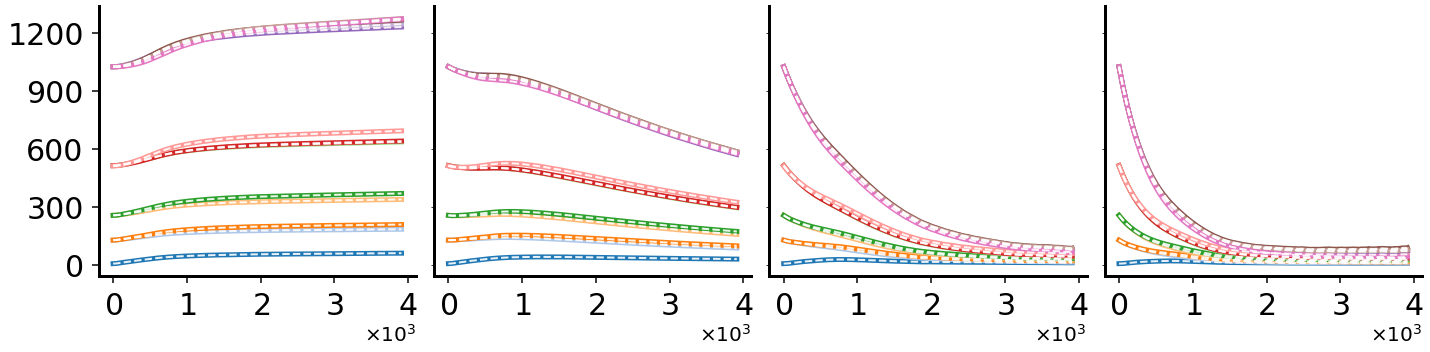

In [102]:
args = {
    "save-dir": "/mnt/fs6/jvrsgsty/neural-mechanics/gs_jvr-pt-tpu",
    "experiment": "tinyimagenet",
    "visualization": "scale"
}
nrows = 1
ncols = 4
fig, axs = plt.subplots(nrows, ncols, figsize=(5*ncols, 5*nrows), sharex='col', sharey=True) #sharex='col'
for j, wd_str in enumerate(["0", "1en4", "5en4", "1en3"]):
    lr_str = "1en1"
    lr = float(lr_str.replace("n", "-"))
    wd = float(wd_str.replace("n", "-"))
    # plot data
    ax = axs[j]
    args['expid'] = f"vgg16-bn_bs256_lr{lr_str}_wd{wd_str}"

    steps, empirical, theoretical = load(args)
    if steps is not None:
        steps = [lr * float(step) for step in steps]
    plot(steps, empirical, theoretical, ax, layer_wise=True)


    # tick params and axis labels
    if j == 0:
        ax.tick_params(axis="y", which="both", bottom=True, top=False,
                       labelbottom=True, left=True, right=False,
                       labelleft=True,direction='out',length=7,width=1.5,pad=8,labelsize=30)
        ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    
    ax.tick_params(axis="x", which="both", bottom=True, top=False,
                   labelbottom=True, left=True, right=False,
                   labelleft=True,direction='out',length=7,width=1.5,pad=8,
                   labelsize=30)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.ticklabel_format(axis="x", style="scientific", scilimits=(0,0), useMathText=True)
    ax.xaxis.offsetText.set_fontsize(20)

    # boundary
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False) 
    for dir in ["top", "bottom", "right", "left"]:
        ax.spines[dir].set_linewidth(3)
            
plt.tight_layout()
plt.savefig("scale_tinyimagenet.pdf")

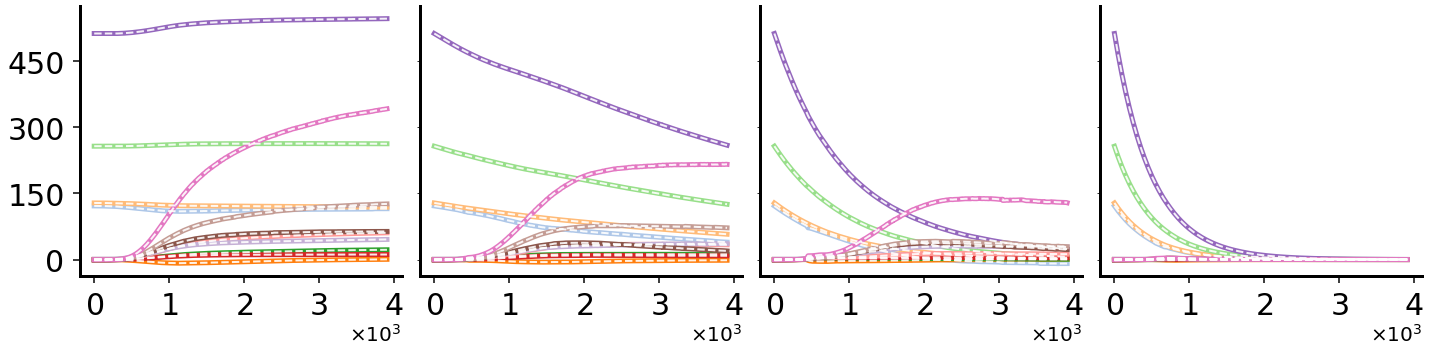

In [103]:
args = {
    "save-dir": "/mnt/fs6/jvrsgsty/neural-mechanics/gs_jvr-pt-tpu",
    "experiment": "tinyimagenet",
    "visualization": "inversion"
}
nrows = 1
ncols = 4
fig, axs = plt.subplots(nrows, ncols, figsize=(5*ncols, 5*nrows), sharex='col', sharey=True) #sharex='col'
for j, wd_str in enumerate(["0", "1en4", "5en4", "1en3"]):
    lr_str = "1en1"
    lr = float(lr_str.replace("n", "-"))
    wd = float(wd_str.replace("n", "-"))
    # plot data
    ax = axs[j]
    args['expid'] = f"vgg16_bs256_lr{lr_str}_wd{wd_str}"

    steps, empirical, theoretical = load(args)
    if steps is not None:
        steps = [lr * float(step) for step in steps]
    plot(steps, empirical, theoretical, ax, layer_wise=True)


    # tick params and axis labels
    if j == 0:
        ax.tick_params(axis="y", which="both", bottom=True, top=False,
                       labelbottom=True, left=True, right=False,
                       labelleft=True,direction='out',length=7,width=1.5,pad=8,labelsize=30)
        ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    
    ax.tick_params(axis="x", which="both", bottom=True, top=False,
                   labelbottom=True, left=True, right=False,
                   labelleft=True,direction='out',length=7,width=1.5,pad=8,
                   labelsize=30)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.ticklabel_format(axis="x", style="scientific", scilimits=(0,0), useMathText=True)
    ax.xaxis.offsetText.set_fontsize(20)

    # boundary
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False) 
    for dir in ["top", "bottom", "right", "left"]:
        ax.spines[dir].set_linewidth(3)
            
plt.tight_layout()
plt.savefig("inversion_tinyimagenet.pdf")

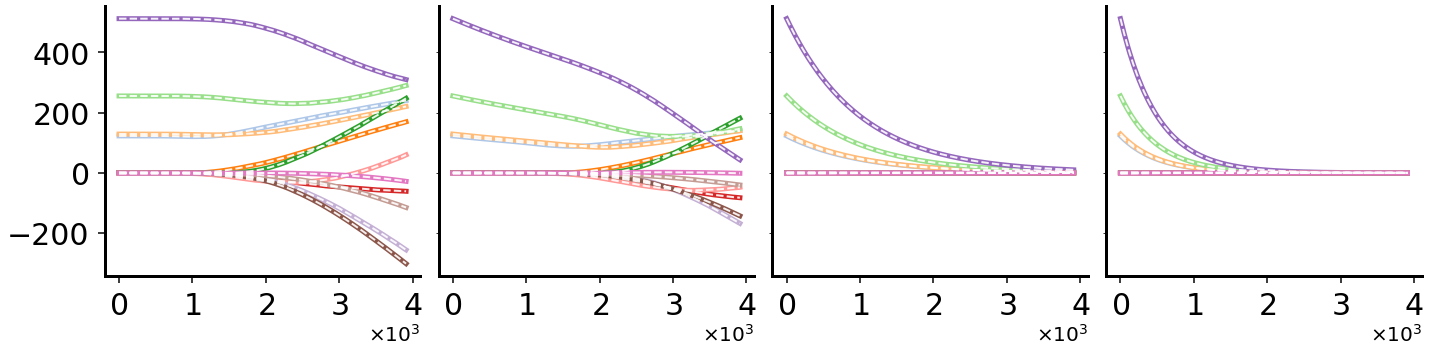

In [105]:
args = {
    "save-dir": "/mnt/fs4/kunin/neural-mechanics/results",
    "experiment": "vgg16",
    "expid": "lr_0.1_wd_0.0",
    "visualization": "inversion"
}
nrows = 1
ncols = 4
fig, axs = plt.subplots(nrows, ncols, figsize=(5*ncols, 5*nrows), sharex='col', sharey=True) #sharex='col'
for j, wd_str in enumerate(["0.0", "0.0001", "0.0005", "0.001"]):
    lr_str = "0.1"
    lr = float(lr_str.replace("n", "-"))
    wd = float(wd_str.replace("n", "-"))
    # plot data
    ax = axs[j]
    args['expid'] = f"lr_{lr_str}_wd_{wd_str}"

    steps, empirical, theoretical = load(args)
    if steps is not None:
        steps = [lr * float(step) for step in steps]
    plot(steps, empirical, theoretical, ax, layer_wise=True)


    # tick params and axis labels
    if j == 0:
        ax.tick_params(axis="y", which="both", bottom=True, top=False,
                       labelbottom=True, left=True, right=False,
                       labelleft=True,direction='out',length=7,width=1.5,pad=8,labelsize=30)
        ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    
    ax.tick_params(axis="x", which="both", bottom=True, top=False,
                   labelbottom=True, left=True, right=False,
                   labelleft=True,direction='out',length=7,width=1.5,pad=8,
                   labelsize=30)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.ticklabel_format(axis="x", style="scientific", scilimits=(0,0), useMathText=True)
    ax.xaxis.offsetText.set_fontsize(20)

    # boundary
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False) 
    for dir in ["top", "bottom", "right", "left"]:
        ax.spines[dir].set_linewidth(3)
            
plt.tight_layout()
plt.savefig("inversion_cifar100_prev.pdf")

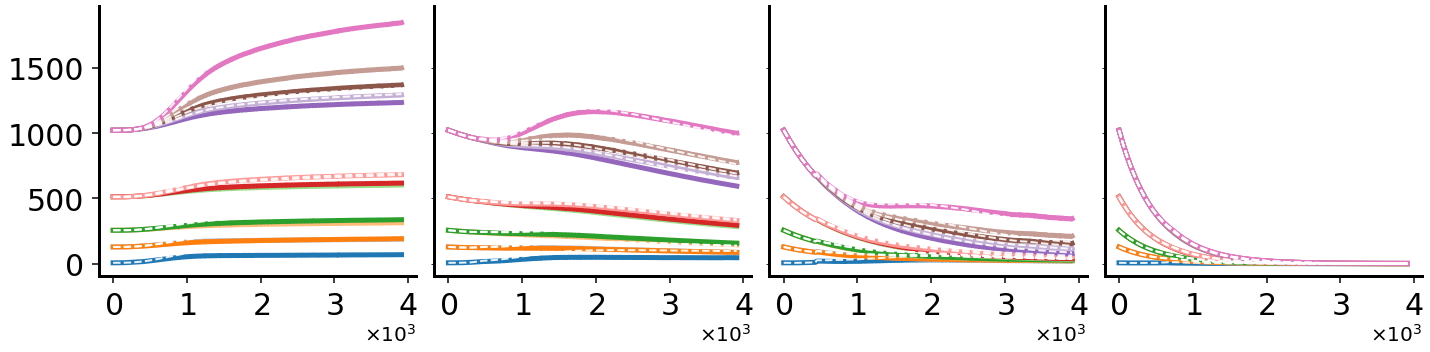

In [120]:
args = {
    "save-dir": "/mnt/fs6/jvrsgsty/neural-mechanics/gs_jvr-pt-tpu",
    "experiment": "tinyimagenet",
    "visualization": "scale"
}
nrows = 1
ncols = 4
fig, axs = plt.subplots(nrows, ncols, figsize=(5*ncols, 5*nrows), sharex='col', sharey=True) #sharex='col'
for j, wd_str in enumerate(["0", "1en4", "5en4", "1en3"]):
    lr_str = "1en1"
    lr = float(lr_str.replace("n", "-"))
    wd = float(wd_str.replace("n", "-"))
    # plot data
    ax = axs[j]
    args['expid'] = f"vgg16_bs256_lr{lr_str}_wd{wd_str}"

    steps, empirical, theoretical = load(args)
    if steps is not None:
        steps = [lr * float(step) for step in steps]
    plot(steps, empirical, theoretical, ax, layer_wise=True)


    # tick params and axis labels
    if j == 0:
        ax.tick_params(axis="y", which="both", bottom=True, top=False,
                       labelbottom=True, left=True, right=False,
                       labelleft=True,direction='out',length=7,width=1.5,pad=8,labelsize=30)
        ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    
    ax.tick_params(axis="x", which="both", bottom=True, top=False,
                   labelbottom=True, left=True, right=False,
                   labelleft=True,direction='out',length=7,width=1.5,pad=8,
                   labelsize=30)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.ticklabel_format(axis="x", style="scientific", scilimits=(0,0), useMathText=True)
    ax.xaxis.offsetText.set_fontsize(20)

    # boundary
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False) 
    for dir in ["top", "bottom", "right", "left"]:
        ax.spines[dir].set_linewidth(3)
            
plt.tight_layout()
plt.savefig("scaleplotoninversionrun_tinyimagenet.pdf")

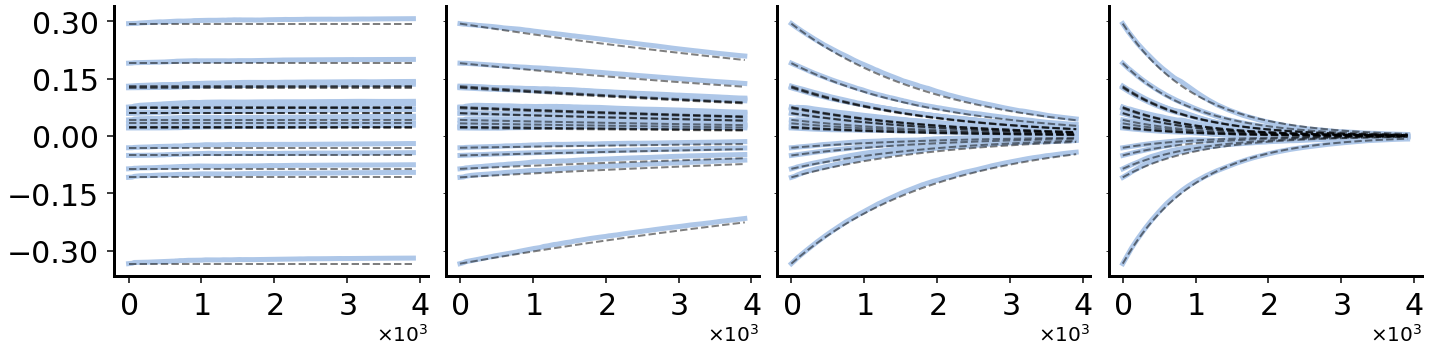

In [141]:
args = {
    "save-dir": "/mnt/fs6/jvrsgsty/neural-mechanics/gs_jvr-pt-tpu",
    "experiment": "tinyimagenet",
    "visualization": "translation"
}
nrows = 1
ncols = 4
fig, axs = plt.subplots(nrows, ncols, figsize=(5*ncols, 5*nrows), sharex='col', sharey=True) #sharex='col'
for j, wd_str in enumerate(["0", "1en4", "5en4", "1en3"]):
    lr_str = "1en1"
    lr = float(lr_str.replace("n", "-"))
    wd = float(wd_str.replace("n", "-"))
    # plot data
    ax = axs[j]
    args['expid'] = f"vgg16_bs256_lr{lr_str}_wd{wd_str}"

    steps, empirical, theoretical = load(args)
    if steps is not None:
        steps = [lr * float(step) for step in steps]
    plot(steps, empirical, theoretical, ax, layer_wise=False, subset=20)


    # tick params and axis labels
    if j == 0:
        ax.tick_params(axis="y", which="both", bottom=True, top=False,
                       labelbottom=True, left=True, right=False,
                       labelleft=True,direction='out',length=7,width=1.5,pad=8,labelsize=30)
        ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    
    ax.tick_params(axis="x", which="both", bottom=True, top=False,
                   labelbottom=True, left=True, right=False,
                   labelleft=True,direction='out',length=7,width=1.5,pad=8,
                   labelsize=30)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.ticklabel_format(axis="x", style="scientific", scilimits=(0,0), useMathText=True)
    ax.xaxis.offsetText.set_fontsize(20)

    # boundary
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False) 
    for dir in ["top", "bottom", "right", "left"]:
        ax.spines[dir].set_linewidth(3)
            
plt.tight_layout()
plt.savefig("translation_tinyimagenet.pdf")

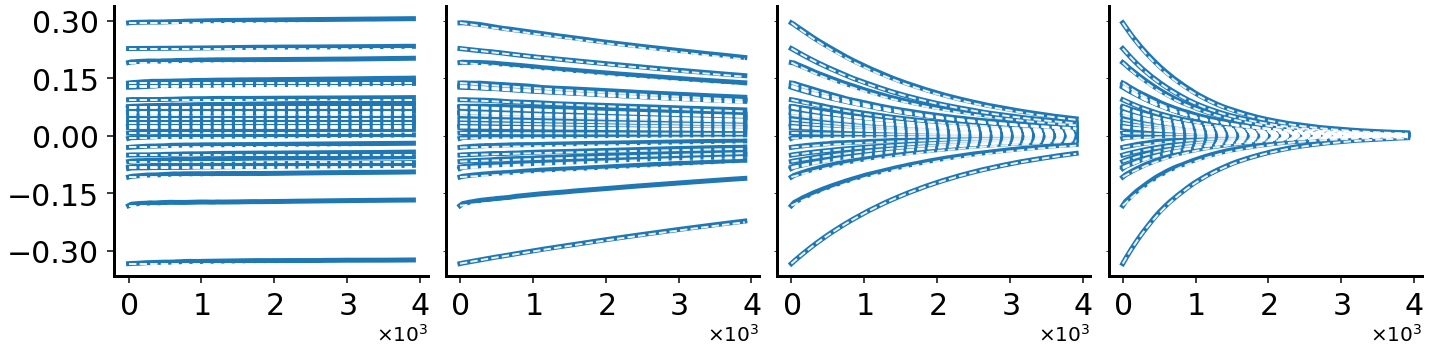

In [119]:
args = {
    "save-dir": "/mnt/fs6/jvrsgsty/neural-mechanics/gs_jvr-pt-tpu",
    "experiment": "tinyimagenet",
    "visualization": "translation"
}
nrows = 1
ncols = 4
fig, axs = plt.subplots(nrows, ncols, figsize=(5*ncols, 5*nrows), sharex='col', sharey=True) #sharex='col'
for j, wd_str in enumerate(["0", "1en4", "5en4", "1en3"]):
    lr_str = "1en1"
    lr = float(lr_str.replace("n", "-"))
    wd = float(wd_str.replace("n", "-"))
    # plot data
    ax = axs[j]
    args['expid'] = f"vgg16-bn_bs256_lr{lr_str}_wd{wd_str}"

    steps, empirical, theoretical = load(args)
    if steps is not None:
        steps = [lr * float(step) for step in steps]
    plot(steps, empirical, theoretical, ax, layer_wise=False, subset=30)


    # tick params and axis labels
    if j == 0:
        ax.tick_params(axis="y", which="both", bottom=True, top=False,
                       labelbottom=True, left=True, right=False,
                       labelleft=True,direction='out',length=7,width=1.5,pad=8,labelsize=30)
        ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    
    ax.tick_params(axis="x", which="both", bottom=True, top=False,
                   labelbottom=True, left=True, right=False,
                   labelleft=True,direction='out',length=7,width=1.5,pad=8,
                   labelsize=30)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.ticklabel_format(axis="x", style="scientific", scilimits=(0,0), useMathText=True)
    ax.xaxis.offsetText.set_fontsize(20)

    # boundary
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False) 
    for dir in ["top", "bottom", "right", "left"]:
        ax.spines[dir].set_linewidth(3)
            
plt.tight_layout()
plt.savefig("translation_bn_tinyimagenet.pdf")

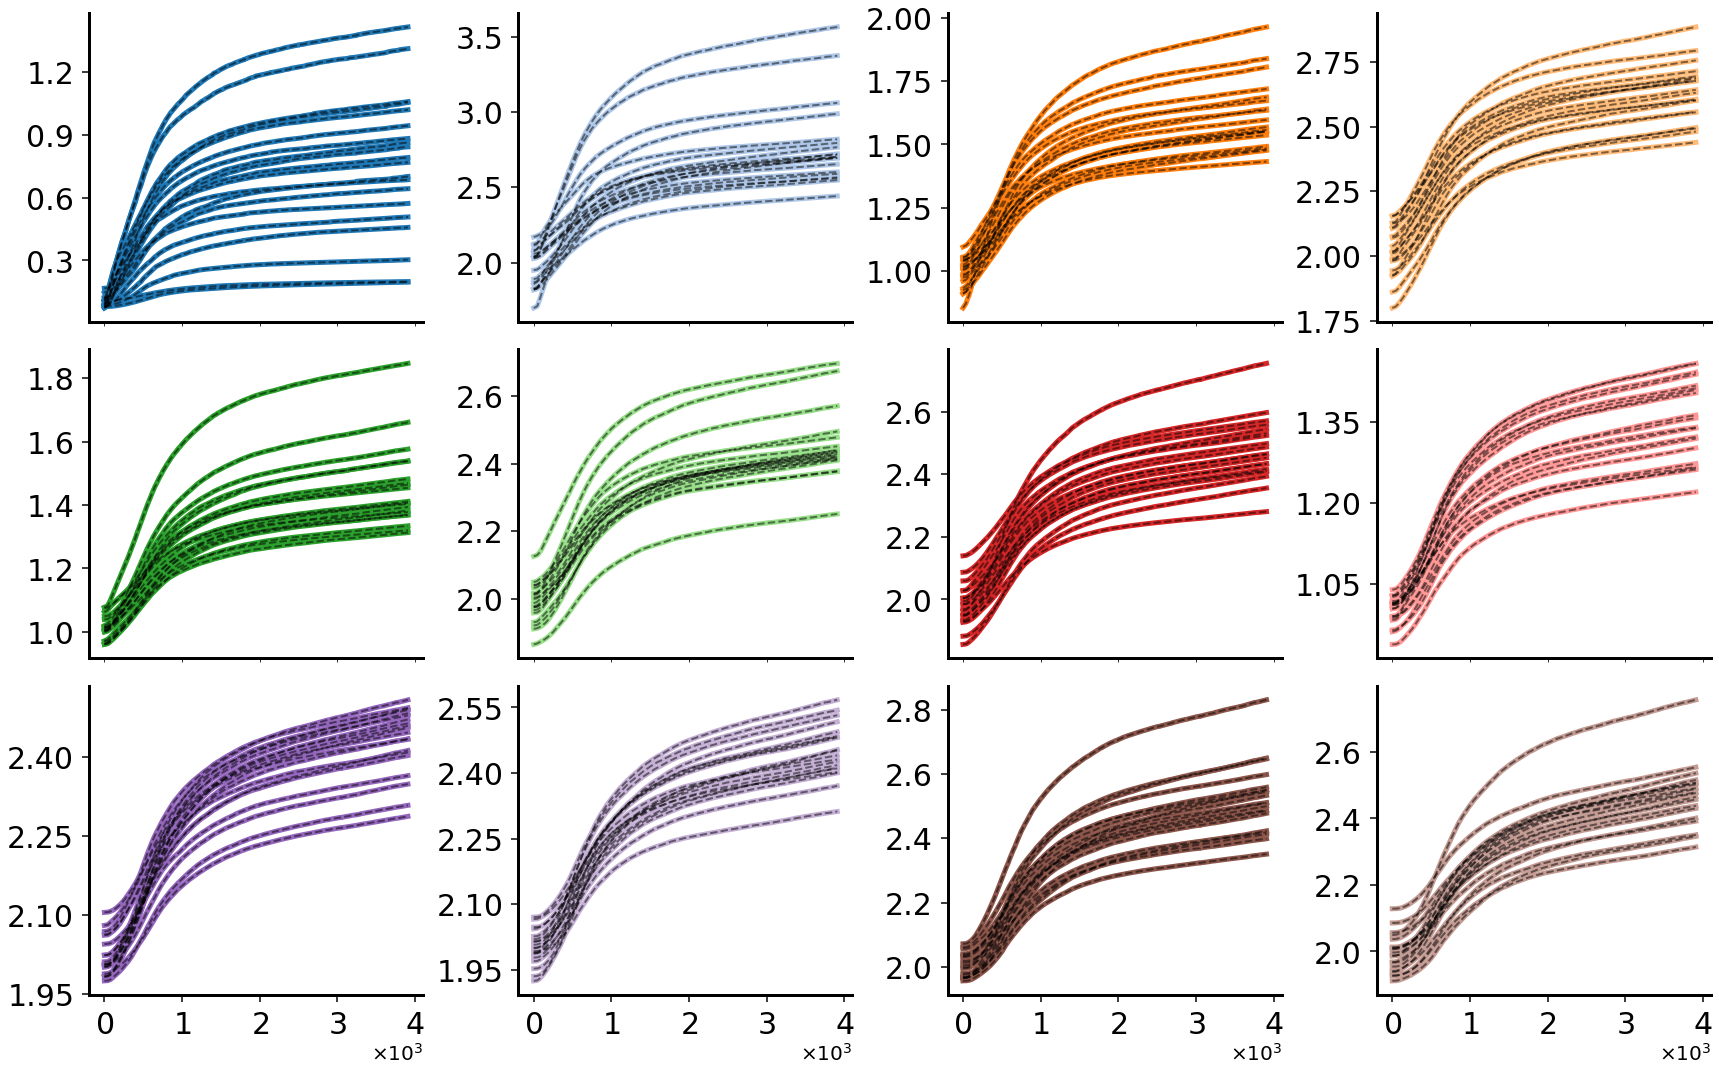

In [159]:
args = {
    "save-dir": "/mnt/fs6/jvrsgsty/neural-mechanics/gs_jvr-pt-tpu",
    "experiment": "tinyimagenet",
}
nrows = 3
ncols = 4
fig, axs = plt.subplots(nrows, ncols, figsize=(6*ncols, 5*nrows), sharex='col')#, sharey=True) #sharex='col'
for i, layer in enumerate(range(12)):
    for j, viz in enumerate(["scale"]):
        lr_str = "1en1"
        wd_str = "0"
        lr = float(lr_str.replace("n", "-"))
        wd = float(wd_str.replace("n", "-"))
        # plot data
        ax = axs[i//ncols + j*3, i%ncols]
        bn = "-bn" if viz == "scale" else ""
        args['expid'] = f"vgg16{bn}_bs256_lr{lr_str}_wd{wd_str}"
        args['visualization'] = f"{viz}"
        
        steps, empirical, theoretical = load(args)
        if steps is not None:
            steps = [lr * float(step) for step in steps]
        plot(steps, empirical, theoretical, ax, layer_wise=False, layer_list=[layer], 
             subset=20, color_idx_adj=0 if viz =="scale" else -1)


        # tick params and axis labels
        ax.tick_params(axis="y", which="both", bottom=True, top=False,
                       labelbottom=True, left=True, right=False,
                       labelleft=True,direction='out',length=7,width=1.5,pad=8,labelsize=30)
        ax.yaxis.set_major_locator(plt.MaxNLocator(5))
        if i > 7:
            ax.tick_params(axis="x", which="both", bottom=True, top=False,
                           labelbottom=True, left=True, right=False,
                           labelleft=True,direction='out',length=7,width=1.5,pad=8,
                           labelsize=30)
            ax.xaxis.set_major_locator(plt.MaxNLocator(5))
            ax.ticklabel_format(axis="x", style="scientific", scilimits=(0,0), useMathText=True)
            ax.xaxis.offsetText.set_fontsize(20)
            
        # boundary
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False) 
        for dir in ["top", "bottom", "right", "left"]:
            ax.spines[dir].set_linewidth(3)
            
plt.tight_layout()
plt.savefig("scale_tinyimagenet_layerwise.pdf")

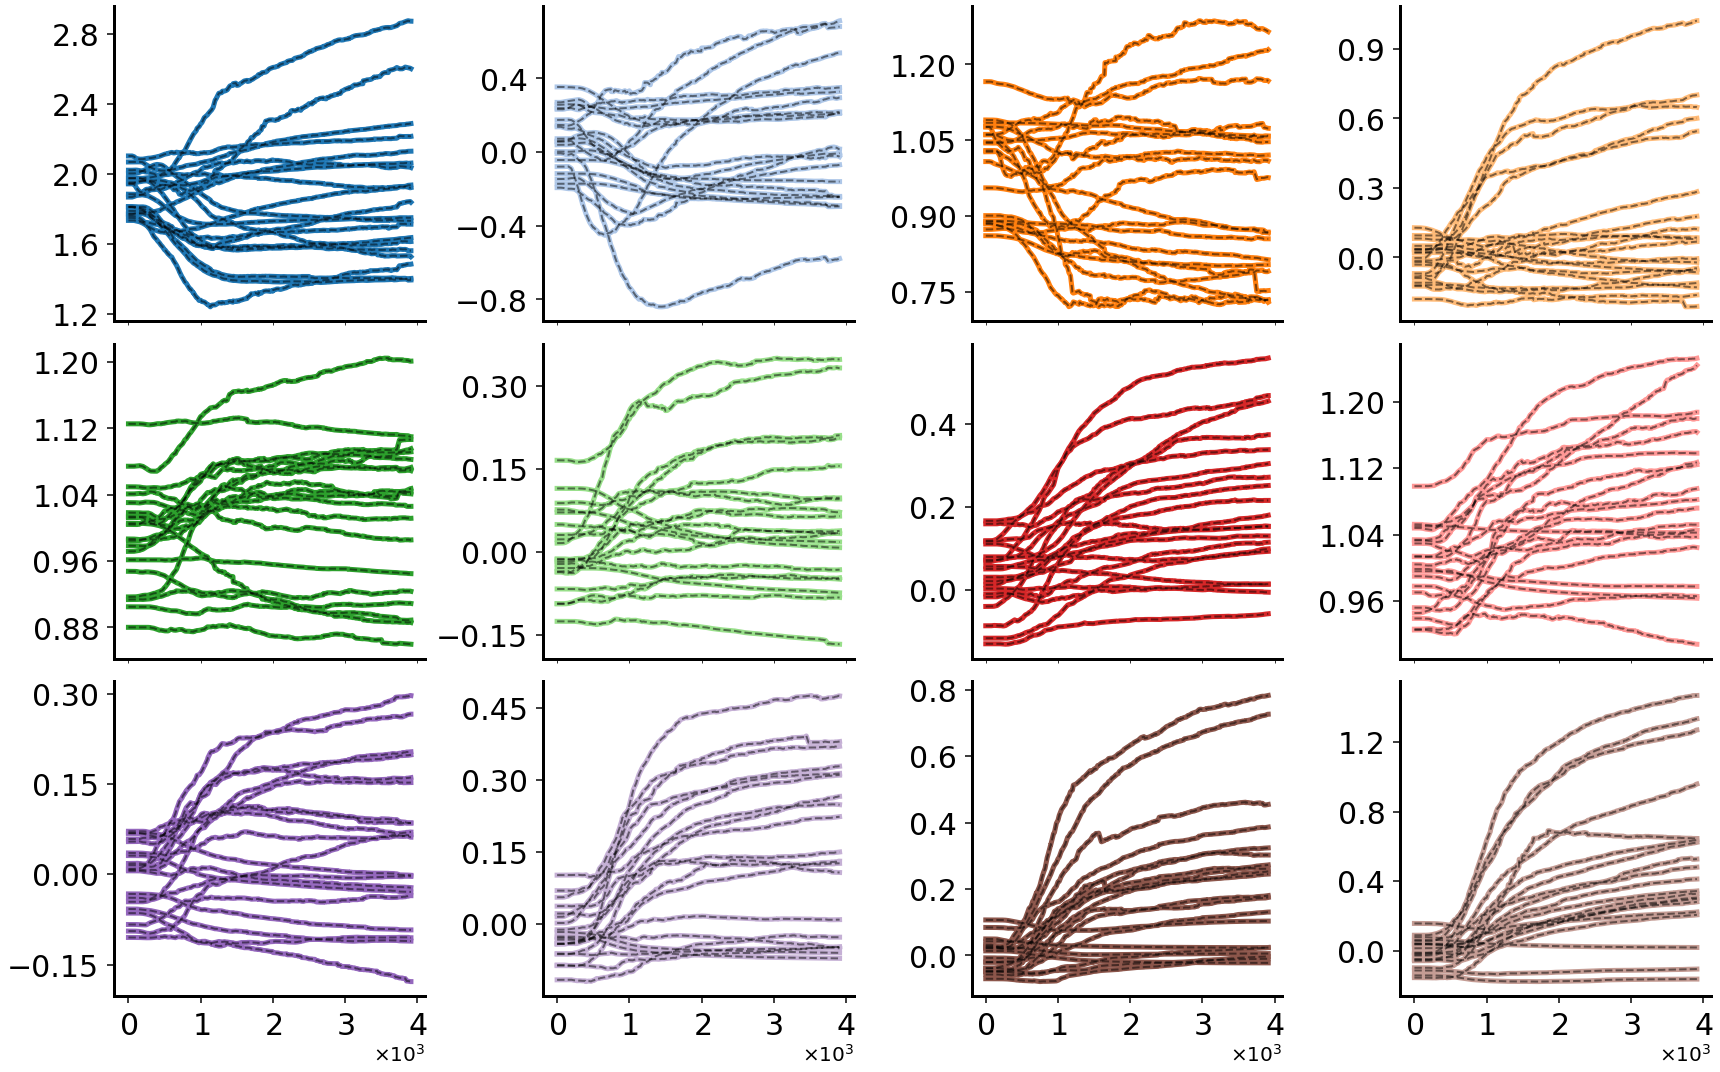

In [157]:
args = {
    "save-dir": "/mnt/fs6/jvrsgsty/neural-mechanics/gs_jvr-pt-tpu",
    "experiment": "tinyimagenet",
}
nrows = 3
ncols = 4
fig, axs = plt.subplots(nrows, ncols, figsize=(6*ncols, 5*nrows), sharex='col')#, sharey='row') #sharex='col'
for i, layer in enumerate(range(12)):
    for j, viz in enumerate(["inversion"]):
        lr_str = "1en1"
        wd_str = "0"
        lr = float(lr_str.replace("n", "-"))
        wd = float(wd_str.replace("n", "-"))
        # plot data
        ax = axs[i//ncols + j*3, i%ncols]
        bn = "-bn" if viz == "scale" else ""
        args['expid'] = f"vgg16{bn}_bs256_lr{lr_str}_wd{wd_str}"
        args['visualization'] = f"{viz}"
        
        steps, empirical, theoretical = load(args)
        if steps is not None:
            steps = [lr * float(step) for step in steps]
        plot(steps, empirical, theoretical, ax, layer_wise=False, layer_list=[layer], 
             subset=20, color_idx_adj=0 if viz =="scale" else -1)


        # tick params and axis labels
        
        ax.tick_params(axis="y", which="both", bottom=True, top=False,
                       labelbottom=True, left=True, right=False,
                       labelleft=True,direction='out',length=7,width=1.5,pad=8,labelsize=30)
        ax.yaxis.set_major_locator(plt.MaxNLocator(5))
        if i > 7:
            ax.tick_params(axis="x", which="both", bottom=True, top=False,
                           labelbottom=True, left=True, right=False,
                           labelleft=True,direction='out',length=7,width=1.5,pad=8,
                           labelsize=30)
            ax.xaxis.set_major_locator(plt.MaxNLocator(5))
            ax.ticklabel_format(axis="x", style="scientific", scilimits=(0,0), useMathText=True)
            ax.xaxis.offsetText.set_fontsize(20)
            
        # boundary
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False) 
        for dir in ["top", "bottom", "right", "left"]:
            ax.spines[dir].set_linewidth(3)
            
plt.tight_layout()
plt.savefig("inversion_tinyimagenet_layerwise.pdf")

# Cifar100, momentum

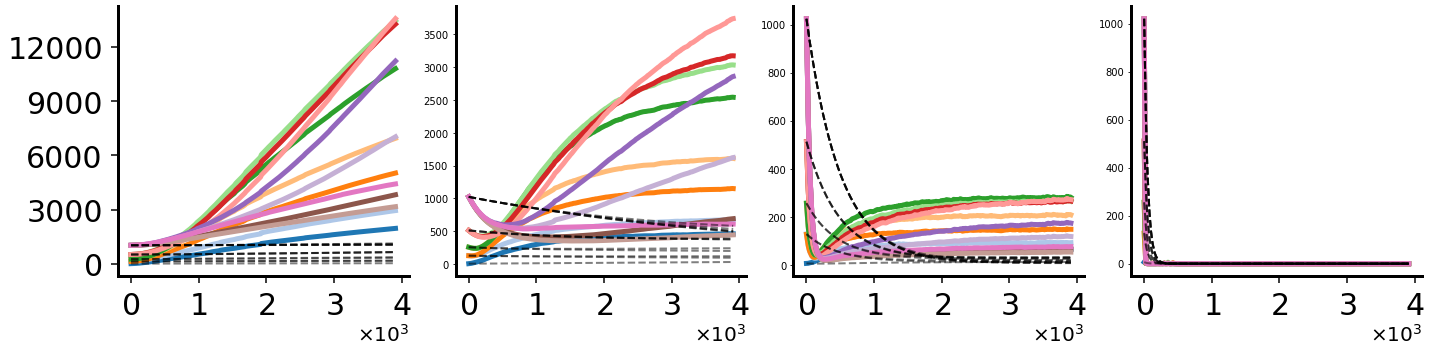

In [218]:
args = {
    "save-dir": "/mnt/fs6/jvrsgsty/neural-mechanics",
    "experiment": "vgg16-bn_momentum",
    "visualization": "scale"
}
nrows = 1
ncols = 4
fig, axs = plt.subplots(nrows, ncols, figsize=(5*ncols, 5*nrows), sharex='col')#, sharey=True) #sharex='col'
for j, wd_str in enumerate(["0.0", "0.0001", "0.001", "0.01"]):
    lr_str = "0.1"
    lr = float(lr_str.replace("n", "-"))
    wd = float(wd_str.replace("n", "-"))
    # plot data
    ax = axs[j]
    args['expid'] = f"lr_{lr_str}_wd_{wd_str}"

    steps, empirical, theoretical = load(args)
    if steps is not None:
        steps = [lr * float(step) for step in steps]
    plot(steps, empirical, theoretical, ax, layer_wise=True)


    # tick params and axis labels
    if j == 0:
        ax.tick_params(axis="y", which="both", bottom=True, top=False,
                       labelbottom=True, left=True, right=False,
                       labelleft=True,direction='out',length=7,width=1.5,pad=8,labelsize=30)
        ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    
    ax.tick_params(axis="x", which="both", bottom=True, top=False,
                   labelbottom=True, left=True, right=False,
                   labelleft=True,direction='out',length=7,width=1.5,pad=8,
                   labelsize=30)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.ticklabel_format(axis="x", style="scientific", scilimits=(0,0), useMathText=True)
    ax.xaxis.offsetText.set_fontsize(20)

    # boundary
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False) 
    for dir in ["top", "bottom", "right", "left"]:
        ax.spines[dir].set_linewidth(3)
            
plt.tight_layout()
plt.savefig("scale_momentum.pdf")

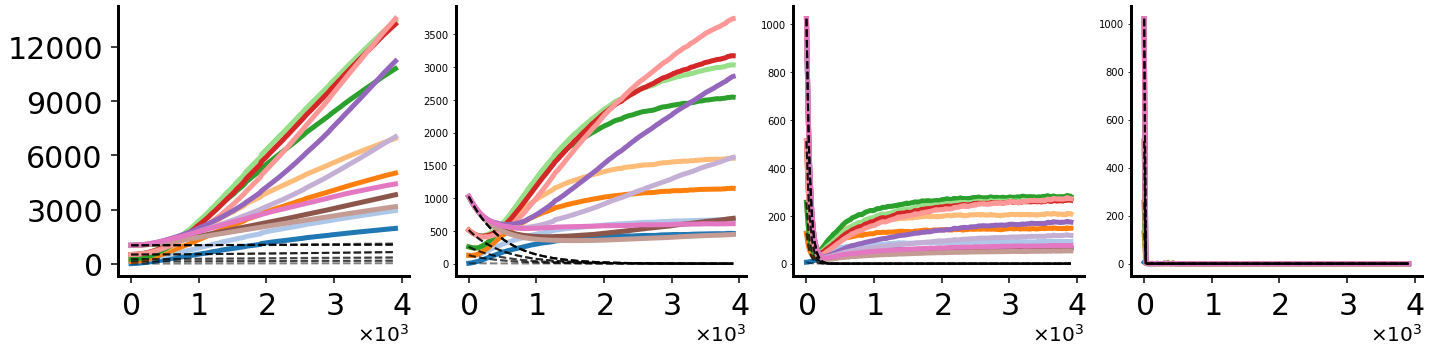

In [210]:
# With the 10 fix
args = {
    "save-dir": "/mnt/fs6/jvrsgsty/neural-mechanics",
    "experiment": "vgg16-bn_momentum",
    "visualization": "scale",
    "image_suffix": "_10x",
}
nrows = 1
ncols = 4
fig, axs = plt.subplots(nrows, ncols, figsize=(5*ncols, 5*nrows), sharex='col')#, sharey=True) #sharex='col'
for j, wd_str in enumerate(["0.0", "0.0001", "0.001", "0.01"]):
    lr_str = "0.1"
    lr = float(lr_str.replace("n", "-"))
    wd = float(wd_str.replace("n", "-"))
    # plot data
    ax = axs[j]
    args['expid'] = f"lr_{lr_str}_wd_{wd_str}"

    steps, empirical, theoretical = load(args)
    if steps is not None:
        steps = [lr * float(step) for step in steps]
    plot(steps, empirical, theoretical, ax, layer_wise=True)


    # tick params and axis labels
    if j == 0:
        ax.tick_params(axis="y", which="both", bottom=True, top=False,
                       labelbottom=True, left=True, right=False,
                       labelleft=True,direction='out',length=7,width=1.5,pad=8,labelsize=30)
        ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    
    ax.tick_params(axis="x", which="both", bottom=True, top=False,
                   labelbottom=True, left=True, right=False,
                   labelleft=True,direction='out',length=7,width=1.5,pad=8,
                   labelsize=30)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.ticklabel_format(axis="x", style="scientific", scilimits=(0,0), useMathText=True)
    ax.xaxis.offsetText.set_fontsize(20)

    # boundary
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False) 
    for dir in ["top", "bottom", "right", "left"]:
        ax.spines[dir].set_linewidth(3)
            
plt.tight_layout()
plt.savefig("scale_momentum_fix.pdf")

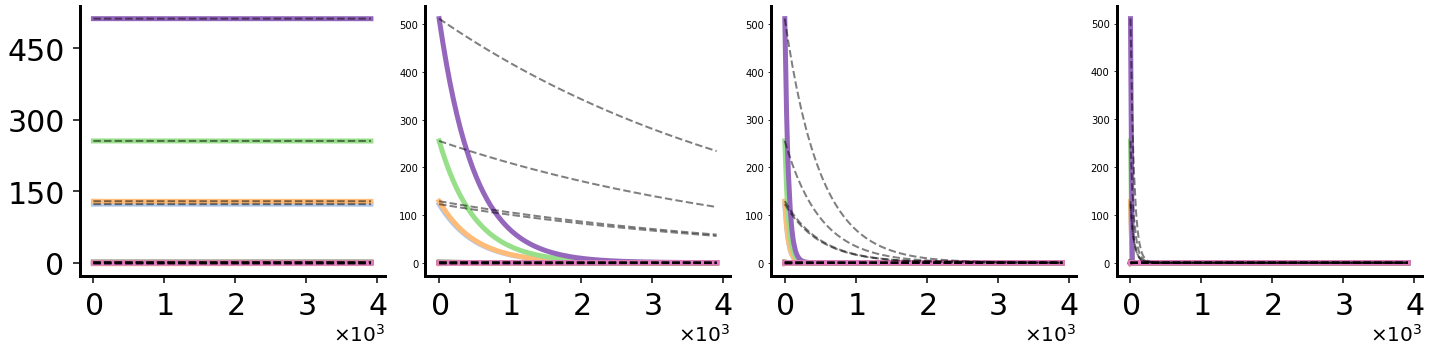

In [211]:
args = {
    "save-dir": "/mnt/fs6/jvrsgsty/neural-mechanics",
    "experiment": "vgg16_momentum",
    "visualization": "inversion"
}
nrows = 1
ncols = 4
fig, axs = plt.subplots(nrows, ncols, figsize=(5*ncols, 5*nrows), sharex='col')#, sharey=True) #sharex='col'
for j, wd_str in enumerate(["0.0", "0.0001", "0.001", "0.01"]):
    lr_str = "0.1"
    lr = float(lr_str.replace("n", "-"))
    wd = float(wd_str.replace("n", "-"))
    # plot data
    ax = axs[j]
    args['expid'] = f"lr_{lr_str}_wd_{wd_str}"

    steps, empirical, theoretical = load(args)
    if steps is not None:
        steps = [lr * float(step) for step in steps]
    plot(steps, empirical, theoretical, ax, layer_wise=True)#, layer_list=[9])


    # tick params and axis labels
    if j == 0:
        ax.tick_params(axis="y", which="both", bottom=True, top=False,
                       labelbottom=True, left=True, right=False,
                       labelleft=True,direction='out',length=7,width=1.5,pad=8,labelsize=30)
        ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    
    ax.tick_params(axis="x", which="both", bottom=True, top=False,
                   labelbottom=True, left=True, right=False,
                   labelleft=True,direction='out',length=7,width=1.5,pad=8,
                   labelsize=30)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.ticklabel_format(axis="x", style="scientific", scilimits=(0,0), useMathText=True)
    ax.xaxis.offsetText.set_fontsize(20)

    # boundary
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False) 
    for dir in ["top", "bottom", "right", "left"]:
        ax.spines[dir].set_linewidth(3)
            
plt.tight_layout()
plt.savefig("inversion_momentum.pdf")

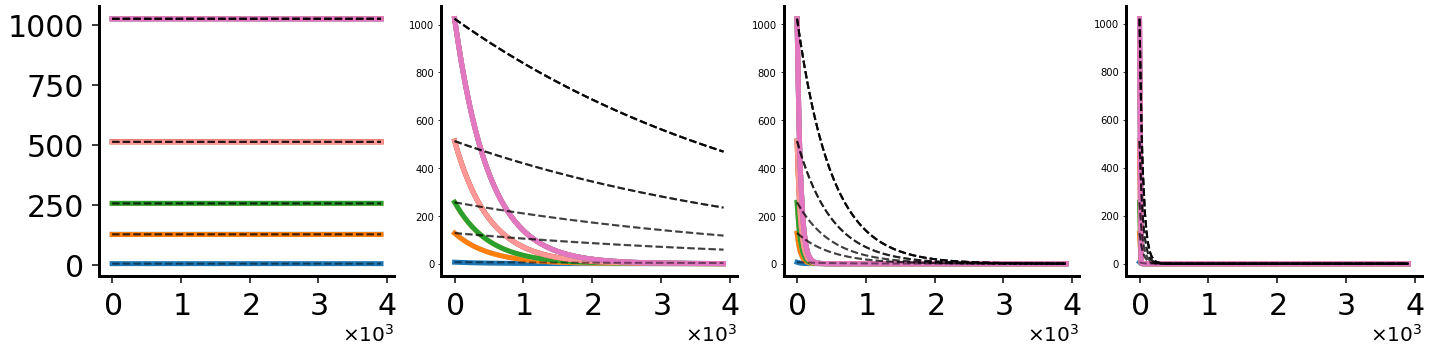

In [212]:
args = {
    "save-dir": "/mnt/fs6/jvrsgsty/neural-mechanics",
    "experiment": "vgg16_momentum",
    "visualization": "scale"
}
nrows = 1
ncols = 4
fig, axs = plt.subplots(nrows, ncols, figsize=(5*ncols, 5*nrows), sharex='col')#, sharey=True) #sharex='col'
for j, wd_str in enumerate(["0.0", "0.0001", "0.001", "0.01"]):
    lr_str = "0.1"
    lr = float(lr_str.replace("n", "-"))
    wd = float(wd_str.replace("n", "-"))
    # plot data
    ax = axs[j]
    args['expid'] = f"lr_{lr_str}_wd_{wd_str}"

    steps, empirical, theoretical = load(args)
    if steps is not None:
        steps = [lr * float(step) for step in steps]
    plot(steps, empirical, theoretical, ax, layer_wise=True)


    # tick params and axis labels
    if j == 0:
        ax.tick_params(axis="y", which="both", bottom=True, top=False,
                       labelbottom=True, left=True, right=False,
                       labelleft=True,direction='out',length=7,width=1.5,pad=8,labelsize=30)
        ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    
    ax.tick_params(axis="x", which="both", bottom=True, top=False,
                   labelbottom=True, left=True, right=False,
                   labelleft=True,direction='out',length=7,width=1.5,pad=8,
                   labelsize=30)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.ticklabel_format(axis="x", style="scientific", scilimits=(0,0), useMathText=True)
    ax.xaxis.offsetText.set_fontsize(20)

    # boundary
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False) 
    for dir in ["top", "bottom", "right", "left"]:
        ax.spines[dir].set_linewidth(3)
            
plt.tight_layout()
plt.savefig("scale_momentum_nobn.pdf")

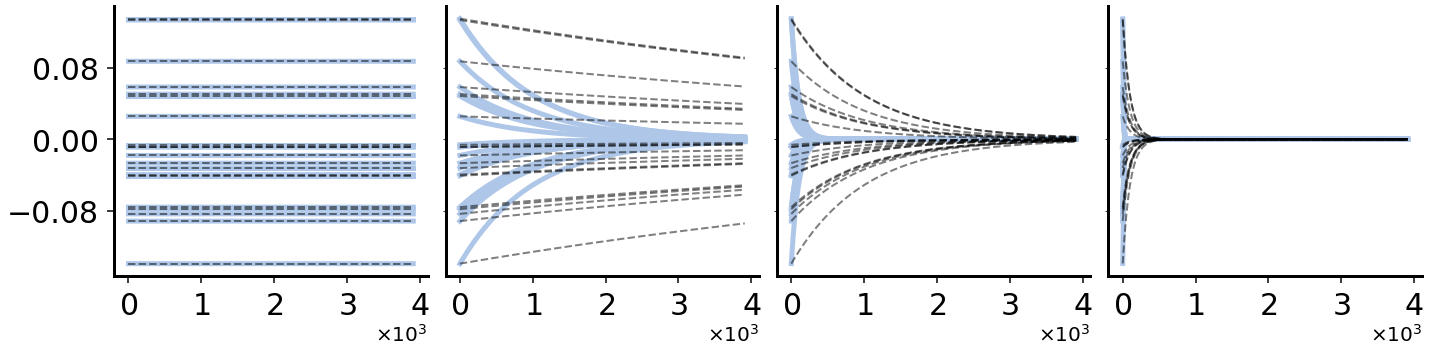

In [219]:
args = {
    "save-dir": "/mnt/fs6/jvrsgsty/neural-mechanics",
    "experiment": "vgg16_momentum",
    "visualization": "translation",
}
nrows = 1
ncols = 4
fig, axs = plt.subplots(nrows, ncols, figsize=(5*ncols, 5*nrows), sharex='col', sharey=True) #sharex='col'
for j, wd_str in enumerate(["0.0", "0.0001", "0.001", "0.01"]):
    lr_str = "0.1"
    lr = float(lr_str.replace("n", "-"))
    wd = float(wd_str.replace("n", "-"))
    # plot data
    ax = axs[j]
    args['expid'] = f"lr_{lr_str}_wd_{wd_str}"

    steps, empirical, theoretical = load(args)
    if steps is not None:
        steps = [lr * float(step) for step in steps]
    plot(steps, empirical, theoretical, ax, layer_wise=False, subset=20)


    # tick params and axis labels
    if j == 0:
        ax.tick_params(axis="y", which="both", bottom=True, top=False,
                       labelbottom=True, left=True, right=False,
                       labelleft=True,direction='out',length=7,width=1.5,pad=8,labelsize=30)
        ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    
    ax.tick_params(axis="x", which="both", bottom=True, top=False,
                   labelbottom=True, left=True, right=False,
                   labelleft=True,direction='out',length=7,width=1.5,pad=8,
                   labelsize=30)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.ticklabel_format(axis="x", style="scientific", scilimits=(0,0), useMathText=True)
    ax.xaxis.offsetText.set_fontsize(20)

    # boundary
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False) 
    for dir in ["top", "bottom", "right", "left"]:
        ax.spines[dir].set_linewidth(3)
            
plt.tight_layout()
plt.savefig("translation_momentum.pdf")

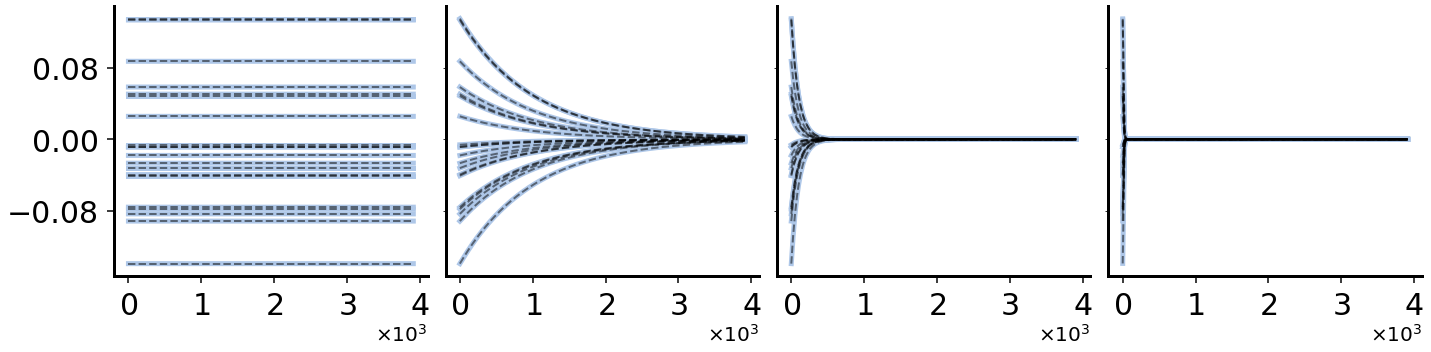

In [215]:
# With the 10 fix
args = {
    "save-dir": "/mnt/fs6/jvrsgsty/neural-mechanics",
    "experiment": "vgg16_momentum",
    "visualization": "translation",
    "image_suffix": "_10x",
}
nrows = 1
ncols = 4
fig, axs = plt.subplots(nrows, ncols, figsize=(5*ncols, 5*nrows), sharex='col', sharey=True) #sharex='col'
for j, wd_str in enumerate(["0.0", "0.0001", "0.001", "0.01"]):
    lr_str = "0.1"
    lr = float(lr_str.replace("n", "-"))
    wd = float(wd_str.replace("n", "-"))
    # plot data
    ax = axs[j]
    args['expid'] = f"lr_{lr_str}_wd_{wd_str}"

    steps, empirical, theoretical = load(args)
    if steps is not None:
        steps = [lr * float(step) for step in steps]
    plot(steps, empirical, theoretical, ax, layer_wise=False, subset=20)


    # tick params and axis labels
    if j == 0:
        ax.tick_params(axis="y", which="both", bottom=True, top=False,
                       labelbottom=True, left=True, right=False,
                       labelleft=True,direction='out',length=7,width=1.5,pad=8,labelsize=30)
        ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    
    ax.tick_params(axis="x", which="both", bottom=True, top=False,
                   labelbottom=True, left=True, right=False,
                   labelleft=True,direction='out',length=7,width=1.5,pad=8,
                   labelsize=30)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.ticklabel_format(axis="x", style="scientific", scilimits=(0,0), useMathText=True)
    ax.xaxis.offsetText.set_fontsize(20)

    # boundary
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False) 
    for dir in ["top", "bottom", "right", "left"]:
        ax.spines[dir].set_linewidth(3)
            
plt.tight_layout()
plt.savefig("translation_momentum.pdf")